# METADATI ISIC 2019 e 2020

Il nostro obiettivo è principalmente quello di selezionare un dataset estremamente "affidabile": per questo abbiamo scelto di far riferimento ai dataset di immagini (open) ISIC relativi alle challenge del 2019 e 2020, come per altro viene fatto nei documenti in letteratura. (Vedi PDF su dataset)

Per combinare i dataset, innanzi tutto è fondamnetale osservare che la challenge 2019 prevede una classificazione multiclasse, a differenza del 2020 in cui la classificazione è binaria (benigno/maligno). Noi abbiamo scelto di mantenere l'approccio binario, per questo motivo è stato scelto di selezionare dal dataset 2019 soltanto le immagini per cui le labels sono MEL e NV (melanoma/neo) classificandoli come maligno/benigno, per poi andare a mergiare con il 2020.

Per quanto riguarda le features a disposizione tra i metadati relativi alle immagini, mentre per il 2020 disponiamo di un patient_id, e sappiamo che le oltre 33000 immagini fanno riferimento a 2056 pazienti, non disponiamo di tale informazione nel dataset ISIC 2019.\
Decidiamo invece di mantenere al momento le altre features quali age, sex, anatom_site_general


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## ISIC 2019

I metadati sono separati dalle relative labels, è necessario fare un merge per ottenere un unico dataframe con features e labels

In [3]:
#Lettura del dataset e salvataggio in DataFrame pandas

isic2019_training = pd.read_csv(r"C:\projects\skcm-gen-data\2019\ISIC_2019_Training_Metadata.csv") 
isic2019_training.head()

image  age_approx anatom_site_general lesion_id     sex
0  ISIC_0000000        55.0      anterior torso       NaN  female
1  ISIC_0000001        30.0      anterior torso       NaN  female
2  ISIC_0000002        60.0     upper extremity       NaN  female
3  ISIC_0000003        30.0     upper extremity       NaN    male
4  ISIC_0000004        80.0     posterior torso       NaN    male

In [4]:
isic2019_training.shape

(25331, 5)

In [5]:
isic2019_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25331 entries, 0 to 25330
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   image                25331 non-null  object 
 1   age_approx           24894 non-null  float64
 2   anatom_site_general  22700 non-null  object 
 3   lesion_id            23247 non-null  object 
 4   sex                  24947 non-null  object 
dtypes: float64(1), object(4)
memory usage: 989.6+ KB


In [6]:
isic2019_groundtruth = pd.read_csv(r"C:\projects\skcm-gen-data\2019\ISIC_2019_Training_GroundTruth.csv") 
isic2019_groundtruth.head()

image  MEL   NV  BCC   AK  BKL   DF  VASC  SCC  UNK
0  ISIC_0000000  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
1  ISIC_0000001  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
2  ISIC_0000002  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
3  ISIC_0000003  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
4  ISIC_0000004  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0

In [7]:
isic2019 = pd.merge(isic2019_training, isic2019_groundtruth, on='image', how='inner')

In [8]:
isic2019.head()

image  age_approx anatom_site_general lesion_id     sex  MEL   NV  \
0  ISIC_0000000        55.0      anterior torso       NaN  female  0.0  1.0   
1  ISIC_0000001        30.0      anterior torso       NaN  female  0.0  1.0   
2  ISIC_0000002        60.0     upper extremity       NaN  female  1.0  0.0   
3  ISIC_0000003        30.0     upper extremity       NaN    male  0.0  1.0   
4  ISIC_0000004        80.0     posterior torso       NaN    male  1.0  0.0   

   BCC   AK  BKL   DF  VASC  SCC  UNK  
0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0   0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0   0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0   0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0   0.0  0.0  0.0

Conto quante immagini ci sono relativamente ad ogni label

Melanoma\
Melanocytic nevus\
Basal cell carcinoma\
Actinic keratosis -> It may be considered an early form of cutaneous squamous cell carcinoma \
Benign keratosis -> Molto comuni ma non diventano mai maligni, , ma si possono confondere con melanomi \
Dermatofibroma -> Non è un tumore benigno della pelle che può diventare maligno, ma si possono confondere con melanomi. \
Vascular lesion -> are generally benign and do not transform into melanoma\
Squamous cell carcinoma \
None of the others 

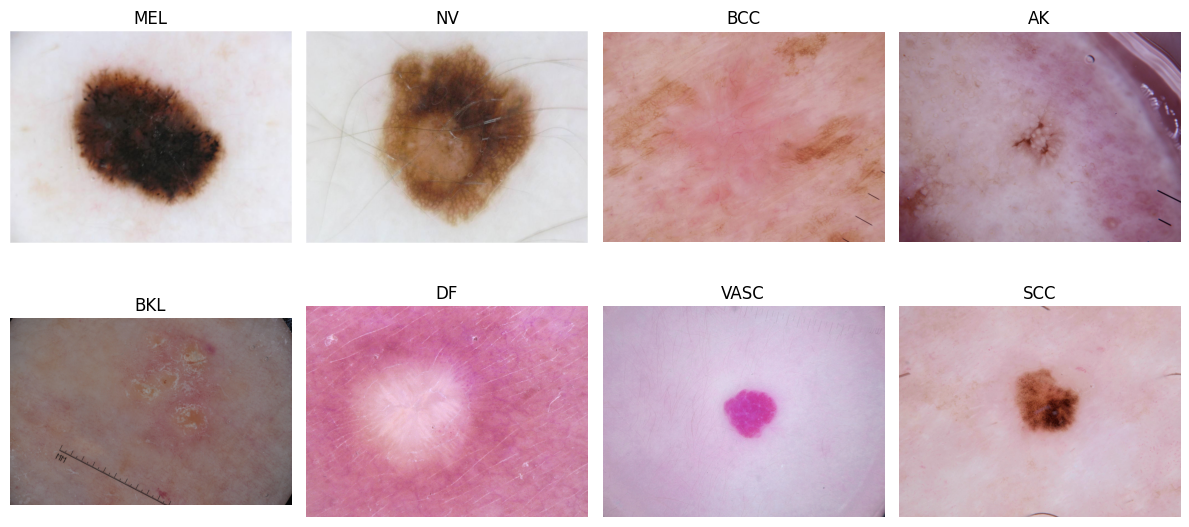

In [9]:
# VOGLIO UN IMMAGINE PER ETICHETTA DA METTERE NELLA PRESENTAZIONE PER IL DATASET
# 
# # Lista delle etichette
import cv2

df = isic2019
labels = ['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC']

# Immagini esemplificative per ogni etichetta
example_images = []
for label in labels:
    # Filtra il dataframe per trovare l'immagine corrispondente all'etichetta
    image_id = df[df[label] == 1]['image'].iloc[2]
    image_path = f'C:/projects/skcm-gen-data/2019/ISIC_2019_Training_Input/ISIC_2019_Training_Input/{image_id}.jpg'  # Sostituisci 'path_to_images' con il percorso delle immagini
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Converti da BGR a RGB
    example_images.append(image)

# Crea una griglia 2x4 per visualizzare le immagini
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
axes = axes.flatten()

for ax, img, label in zip(axes, example_images, labels):
    ax.imshow(img)
    ax.set_title(label)
    ax.axis('off')

plt.tight_layout()
plt.show()


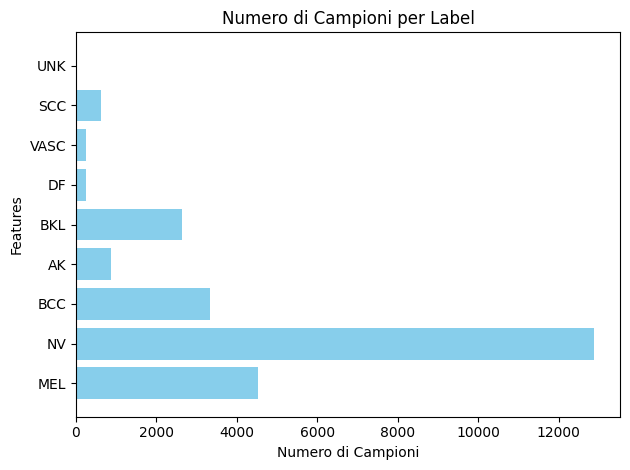

In [10]:
import matplotlib.pyplot as plt
import numpy as np

def grafico_barre_orizzontali(campioni):
    # Nomi delle features
    features = ['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC', 'UNK']
    
    # Conteggio dei campioni per ciascuna feature
    conteggi = [np.sum(campioni[feature]) for feature in features]
    
    # Creazione del grafico
    plt.barh(features, conteggi, color='skyblue')
    plt.xlabel('Numero di Campioni')
    plt.ylabel('Features')
    plt.title('Numero di Campioni per Label')
    plt.tight_layout()
    
    # Mostra il grafico
    plt.show()

grafico_barre_orizzontali(isic2019)


In [11]:
MEL = np.sum(isic2019['MEL'])
NV = np.sum(isic2019['NV'])
BCC = np.sum(isic2019['BCC'])
AK = np.sum(isic2019['AK'])
BKL = np.sum(isic2019['BKL'])
DF = np.sum(isic2019['DF'])
VASC = np.sum(isic2019['VASC'])
SCC = np.sum(isic2019['SCC'])
UNK = np.sum(isic2019['UNK'])
data = { 'MEL':MEL ,'NV':NV, 'BCC': BCC, 'AK': AK, 'BKL': BKL, 'DF':DF, 'VASC': VASC, 'SCC':SCC, 'UNK': UNK}
count_labels = pd.Series(data)

In [12]:
count_labels

MEL      4522.0
NV      12875.0
BCC      3323.0
AK        867.0
BKL      2624.0
DF        239.0
VASC      253.0
SCC       628.0
UNK         0.0
dtype: float64

Vogliamo impostare un problema di classificazione binario su maligno/benigno.

Creare un'unica label numerica 0/1. \
Aggiugniamo quindi una nuova feature target "malignant" a cui assoceremo 1 se maligno (=MEL), 0 altrimenti (=NV)

In [13]:
#Creo una copia del dataset mergiato se mai volessi tornare indietro senza restartare tutto
isic2019_original = isic2019.copy()

In [14]:
#Creo la colonna 'malign' che avrà valore 0/1
isic2019['malignant'] = np.zeros(len(isic2019))

Eliminiamo ciò che ha a che fare con carcinoma e/o che non si evolve in melanoma.

In [15]:
#Settiamo 1 in malignant per le immagini labellate come MEL
isic2019.loc[isic2019['MEL'] == 1, 'malignant'] = 1

#Eliminiamo le istanze che hanno a che fare con carcinoma
isic2019_clean = isic2019[(isic2019['AK'] == 0) & (isic2019['BCC'] == 0) & (isic2019['BKL'] == 0) & (isic2019['DF'] == 0) & (isic2019['SCC'] == 0) & (isic2019['VASC'] == 0)]


In [16]:
isic2019_clean.shape
#Risulta coerente col fatto che 25331-(3323+867)= 17397

(17397, 15)

In [17]:
#Elimino le label multiclasse mantenendo solo la distinzione benigno/maligno
isic2019_clean = isic2019_clean.drop(columns=count_labels.index)

In [18]:
isic2019_clean.head()

image  age_approx anatom_site_general lesion_id     sex  malignant
0  ISIC_0000000        55.0      anterior torso       NaN  female        0.0
1  ISIC_0000001        30.0      anterior torso       NaN  female        0.0
2  ISIC_0000002        60.0     upper extremity       NaN  female        1.0
3  ISIC_0000003        30.0     upper extremity       NaN    male        0.0
4  ISIC_0000004        80.0     posterior torso       NaN    male        1.0

In [19]:
isic2019_clean['malignant'].sum()

np.float64(4522.0)

C:\Users\pietro.rossi\AppData\Local\Temp\ipykernel_40472\2878804877.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette="viridis")


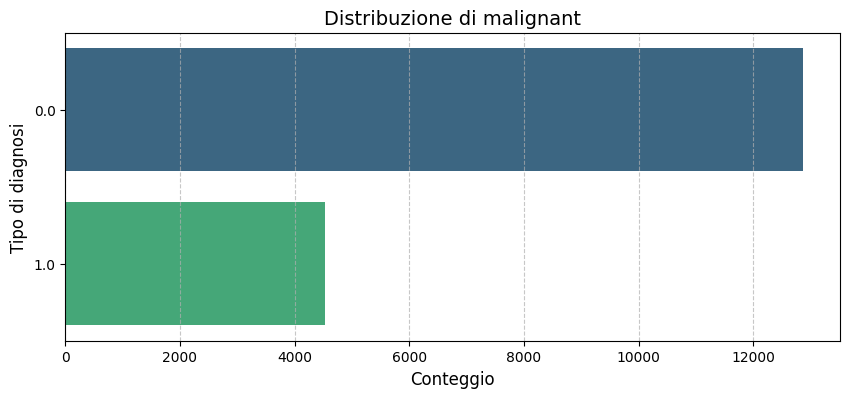

In [20]:
def plot_label_distribution(df, feature):
    plt.figure(figsize=(10, 4))
    sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette="viridis")
    plt.title(f"Distribuzione di {feature}", fontsize=14)  # Titolo dinamico basato sulla feature
    plt.xlabel("Conteggio", fontsize=12)
    plt.ylabel("Tipo di diagnosi", fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

plot_label_distribution(isic2019_clean, 'malignant')

### Analisi di alcune feautures

Dobbiamo capire se le immagini che hanno lo stesso **lesion_id** sono immagini uguali

In [21]:
# Raggruppare per lesion_id e trovare duplicati
duplicate_lesions = isic2019_clean.groupby('lesion_id')['image'].apply(list)

# Filtrare solo i lesion_id che hanno più di una immagine associata
duplicate_lesions = duplicate_lesions[duplicate_lesions.apply(len) > 1]

# Stampare i risultati
print(duplicate_lesions)

unique_lesion_id = isic2019_clean['lesion_id'].nunique()
num_duplicati = len(duplicate_lesions)

lesion_id
BCN_0000002            [ISIC_0063365, ISIC_0063477, ISIC_0067961]
BCN_0000010            [ISIC_0060295, ISIC_0063882, ISIC_0064554]
BCN_0000011                          [ISIC_0066783, ISIC_0072280]
BCN_0000017            [ISIC_0062486, ISIC_0065614, ISIC_0068678]
BCN_0000019     [ISIC_0053456, ISIC_0053891, ISIC_0056261, ISI...
                                      ...                        
MSK4_0010026    [ISIC_0012930_downsampled, ISIC_0013232_downsa...
MSK4_0010027    [ISIC_0013626_downsampled, ISIC_0014077_downsa...
MSK4_0010028    [ISIC_0014079_downsampled, ISIC_0014222_downsa...
MSK4_0010029    [ISIC_0012756_downsampled, ISIC_0013184_downsa...
MSK4_0010031    [ISIC_0013497_downsampled, ISIC_0014238_downsa...
Name: image, Length: 3011, dtype: object


In [22]:
print("Numero di immagini considerate:", int(isic2019_clean.shape[0]))
print("Numero di lesion_id totali presenti:", int(unique_lesion_id))
print("Numero di lesion_id con più immagini associate:", int(num_duplicati))

Numero di immagini considerate: 17397
Numero di lesion_id totali presenti: 8434
Numero di lesion_id con più immagini associate: 3011


Si può ipotizzare che immagini con stesso lesion_id possano essere evoluzioni nel tempo di uno stesso neo.

Tra tutti questi lesion_id "duplicati" identificati, quali hanno delle immagini associate con **label diversi tra loro**?

In [23]:
# Raggruppare per lesion_id, raccogliere le immagini e le loro label
lesion_labels = isic2019_clean.groupby('lesion_id').agg({'image': list, 'malignant': set})

# Filtrare i lesion_id con più di una label diversa
lesion_labels_multiple = lesion_labels[lesion_labels['malignant'].apply(len) > 1]

# Stampare i risultati
lesion_labels_multiple


Empty DataFrame
Columns: [image, malignant]
Index: []

Il DataFrame vuoto ottenuto sopra suggerisce che immagini con lo stesso **lesion_id** hanno lo stesso label.

In [24]:
# Selezionare la prima immagine per ogni lesion_id e salvare la label
labels_salvate = isic2019_clean.loc[isic2019_clean['image'].isin(duplicate_lesions.apply(lambda x: x[0])), 'malignant']

# Calcolare la somma delle label
num_melanoma_duplicates = labels_salvate.sum()

# Stampare i risultati
print("Numero di lesion_id duplicati con immagini associate di melanoma:", int(num_melanoma_duplicates))
print("Numero di lesion_id duplicati con immagini associate di nei:", int(num_duplicati-num_melanoma_duplicates))


Numero di lesion_id duplicati con immagini associate di melanoma: 892
Numero di lesion_id duplicati con immagini associate di nei: 2119


Qui mostriamo in sequenza delle immagini con stesso lesion_id per dare un'idea della loro associazione

In [25]:
import os
from PIL import Image
import matplotlib.pyplot as plt

def mostra_immagini_per_lesione(dataframe, lesion_id, percorso_base):
    """
    Visualizza le immagini associate a un lesion_id specifico.
    
    Args:
        dataframe (pd.DataFrame): Il DataFrame contenente le colonne 'lesion_id' e 'image'.
        lesion_id (str): L'ID della lesione di interesse.
        percorso_base (str): Il percorso base della directory contenente le immagini.
    """
    
    filtered_df = dataframe[dataframe['lesion_id'] == lesion_id]

    if filtered_df.empty:
        print(f"Nessuna immagine trovata per lesion_id: {lesion_id}")
        return
  
    fig, axes = plt.subplots(1, len(filtered_df), figsize=(20, 12))

    for ax, image_path in zip(axes, filtered_df['image']):
        img = Image.open(os.path.join(percorso_base, image_path + '.jpg'))  # Percorso completo
        ax.imshow(img)
        ax.axis('off')  # Rimuove gli assi per una visualizzazione pulita

    plt.show()

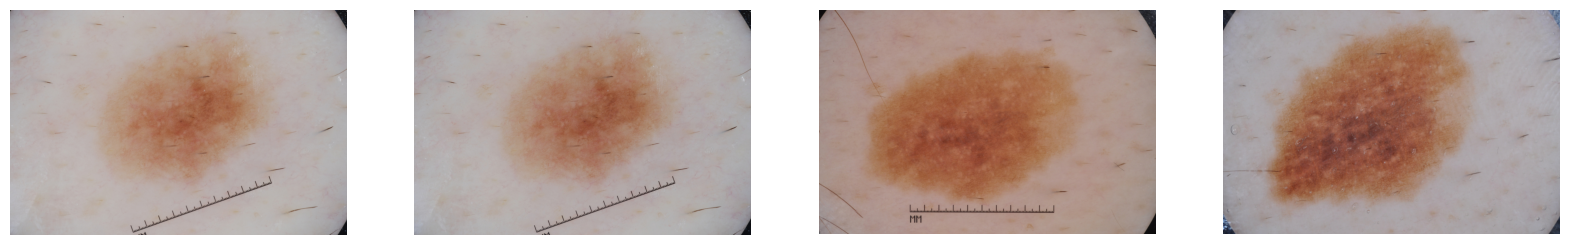

In [26]:
percorso_base = "C:/projects/skcm-gen-data/2019/ISIC_2019_Training_Input/ISIC_2019_Training_Input/"
mostra_immagini_per_lesione(isic2019_clean, 'MSK4_0010029', percorso_base)

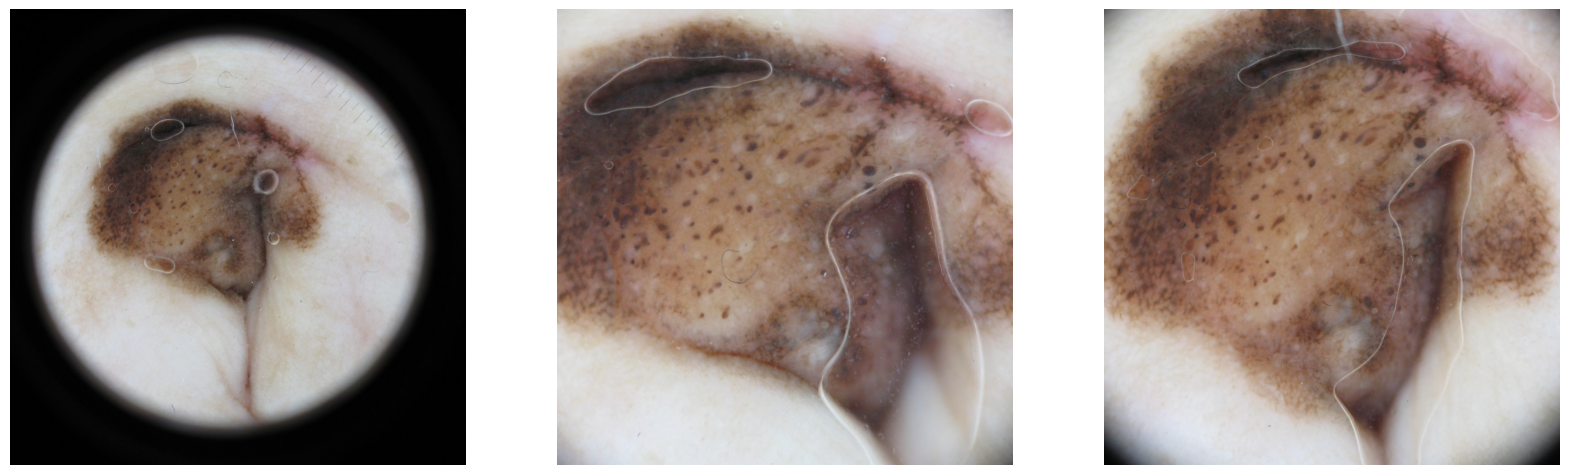

In [27]:
mostra_immagini_per_lesione(isic2019_clean, 'BCN_0000010', percorso_base)

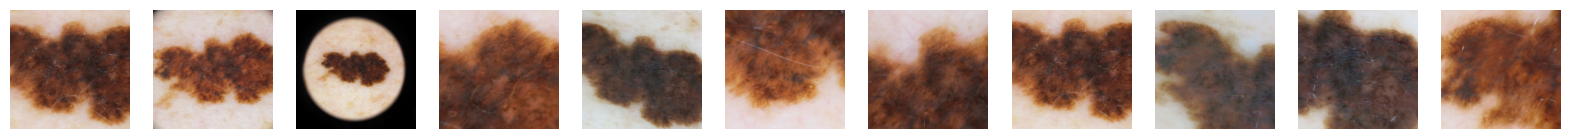

In [28]:
mostra_immagini_per_lesione(isic2019_clean, 'BCN_0000019', percorso_base)

Concludiamo che può essere lo stesso per immagini diverse riferite alla stessa lesione

### Dati di TEST

In [29]:
isic2019_test = pd.read_csv(r"C:\projects\skcm-gen-data\2019\ISIC_2019_Test_GroundTruth.csv")
isic2019_test.head()

image  MEL   NV  BCC   AK  BKL   DF  VASC  SCC  UNK  score_weight  \
0  ISIC_0034321  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0           0.0   
1  ISIC_0034322  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0           0.0   
2  ISIC_0034323  0.0  0.0  1.0  0.0  0.0  0.0   0.0  0.0  0.0           0.0   
3  ISIC_0034324  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0           0.0   
4  ISIC_0034325  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0           0.0   

   validation_weight  
0                1.0  
1                1.0  
2                1.0  
3                1.0  
4                1.0

In [30]:
isic2019_test['MEL'].sum()

np.float64(1327.0)

In [31]:
isic2019_test['malignant'] = np.zeros(len(isic2019_test))

In [32]:
#Settiamo 1 in malignant per le immagini labellate come MEL
isic2019_test.loc[isic2019_test['MEL'] == 1, 'malignant'] = 1

#Eliminiamo le istanze che non sono MEL e NV
isic2019_test_clean = isic2019_test[(isic2019_test['MEL'] == 1) | (isic2019_test['NV'] == 1)]

In [33]:
isic2019_test_clean.shape

(3822, 13)

In [34]:
isic2019_test_clean['malignant'].sum()

np.float64(1327.0)

## ISIC 2020

In [36]:
#La versione v2 ha anche la features lesion_id
isic2020 = pd.read_csv(r"C:\projects\skcm-gen-data\2020\ISIC_2020_Training_GroundTruth_v2.csv")
isic2020.head()

image_name  patient_id   lesion_id     sex  age_approx  \
0  ISIC_2637011  IP_7279968  IL_7972535    male        45.0   
1  ISIC_0015719  IP_3075186  IL_4649854  female        45.0   
2  ISIC_0052212  IP_2842074  IL_9087444  female        50.0   
3  ISIC_0068279  IP_6890425  IL_4255399  female        45.0   
4  ISIC_0074268  IP_8723313  IL_6898037  female        55.0   

  anatom_site_general_challenge diagnosis benign_malignant  target  
0                     head/neck   unknown           benign       0  
1               upper extremity   unknown           benign       0  
2               lower extremity     nevus           benign       0  
3                     head/neck   unknown           benign       0  
4               upper extremity   unknown           benign       0

In [37]:
isic2020_original = isic2020.copy()

In [38]:
isic2020['target'].sum()

np.int64(584)

In [39]:
isic2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33126 entries, 0 to 33125
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     33126 non-null  object 
 1   patient_id                     33126 non-null  object 
 2   lesion_id                      33126 non-null  object 
 3   sex                            33061 non-null  object 
 4   age_approx                     33058 non-null  float64
 5   anatom_site_general_challenge  32599 non-null  object 
 6   diagnosis                      33126 non-null  object 
 7   benign_malignant               33126 non-null  object 
 8   target                         33126 non-null  int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 2.3+ MB


Verifichiamo con l'attributo **patient_id** che effettivamente il numero di pazienti considerato sia 2056 come indicato in ISIC 2020

In [40]:
isic2020['patient_id'].nunique()

2056

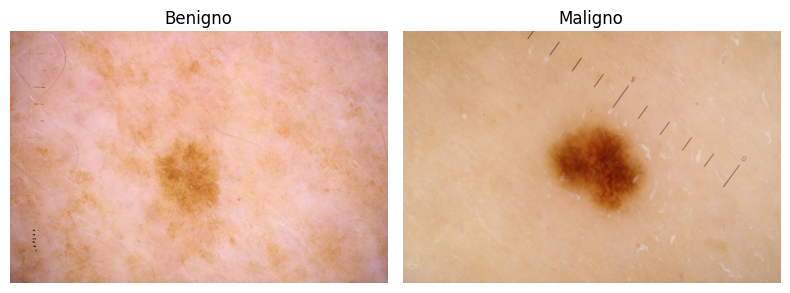

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2

# Carica il dataframe (sostituisci 'isic2020.csv' con il percorso del tuo file)
df = isic2020

# Filtra il dataframe per un'immagine benigno e una maligno
benign_image_id = df[df['target'] == 0]['image_name'].iloc[4]
malignant_image_id = df[df['target'] == 1]['image_name'].iloc[6]

# Percorsi delle immagini (sostituisci 'path_to_images' con il percorso delle tue immagini)
benign_image_path = f'C:/projects/skcm-gen-data/2020/ISIC_2020_Training_JPEG/train/{benign_image_id}.jpg'
malignant_image_path = f'C:/projects/skcm-gen-data/2020/ISIC_2020_Training_JPEG/train/{malignant_image_id}.jpg'

# Carica le immagini
benign_image = cv2.imread(benign_image_path)
benign_image = cv2.cvtColor(benign_image, cv2.COLOR_BGR2RGB)  # Converti da BGR a RGB

malignant_image = cv2.imread(malignant_image_path)
malignant_image = cv2.cvtColor(malignant_image, cv2.COLOR_BGR2RGB)  # Converti da BGR a RGB

# Visualizza le immagini affiancate
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

axes[0].imshow(benign_image)
axes[0].set_title("Benigno")
axes[0].axis('off')

axes[1].imshow(malignant_image)
axes[1].set_title("Maligno")
axes[1].axis('off')

plt.tight_layout()
plt.show()


#### Label

In [42]:
num_mel = isic2020['target'].sum()
print('Numero di immagini di melanoma in ISIC 2020:', int(num_mel))
print('Numero di immagini di nei in ISIC 2020:', int(len(isic2020)-num_mel))

Numero di immagini di melanoma in ISIC 2020: 584
Numero di immagini di nei in ISIC 2020: 32542


C:\Users\pietro.rossi\AppData\Local\Temp\ipykernel_40472\2878804877.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette="viridis")


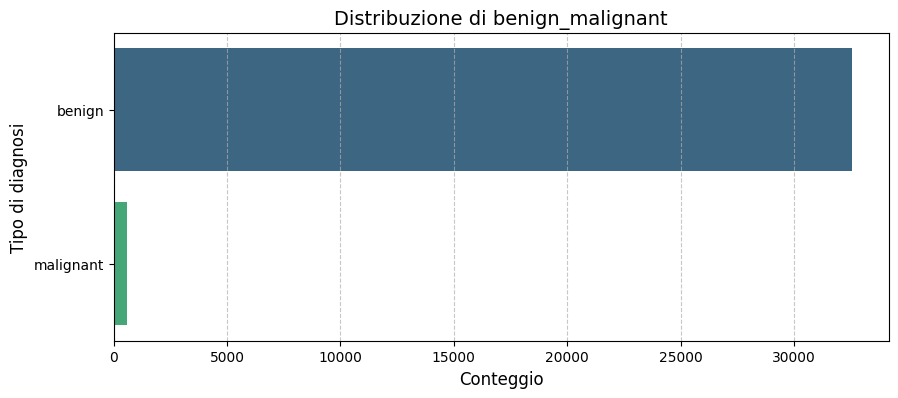

In [43]:
plot_label_distribution(isic2020, 'benign_malignant')

Analizziamo la feature **lesion_id** analogamente a quanto fatto in precedenza

In [44]:
# Raggruppare per lesion_id e trovare duplicati
duplicate_lesions = isic2020.groupby('lesion_id')['image_name'].apply(list)
duplicate_lesions = duplicate_lesions[duplicate_lesions.apply(len) > 1]

print(duplicate_lesions)

unique_lesion_id = isic2020['lesion_id'].nunique()
num_duplicati = len(duplicate_lesions)

lesion_id
IL_0025314    [ISIC_5361965, ISIC_6402957]
IL_0053220    [ISIC_0789732, ISIC_8303710]
IL_0057914    [ISIC_0723505, ISIC_9012331]
IL_0088743    [ISIC_2010700, ISIC_4244870]
IL_0102111    [ISIC_7079599, ISIC_9038898]
                          ...             
IL_9873471    [ISIC_9432244, ISIC_9645937]
IL_9936570    [ISIC_3042182, ISIC_4403411]
IL_9936700    [ISIC_4556458, ISIC_8776630]
IL_9957376    [ISIC_5626944, ISIC_6254045]
IL_9959009    [ISIC_0658225, ISIC_6907218]
Name: image_name, Length: 425, dtype: object


In [45]:
print("Numero di immagini considerate:", int(isic2020.shape[0]))
print("Numero di lesion_id totali presenti:", int(unique_lesion_id))
print("Numero di lesion_id con più immagini associate:", int(num_duplicati))

Numero di immagini considerate: 33126
Numero di lesion_id totali presenti: 32701
Numero di lesion_id con più immagini associate: 425


Osserviamo innanzi tutto che i lesion_id "duplicati" hanno sempre due immagini associate (diversamente da isic 2019)

Osserviamo invece in comune a isic 2019 che immagini con stesso lesion_id sono etichettate allo stesso modo!

In [46]:
# Raggruppare per lesion_id, raccogliere le immagini e le loro label
lesion_labels = isic2020.groupby('lesion_id').agg({'image_name': list, 'target': set})

# Filtrare i lesion_id con più di una label diversa
lesion_labels_multiple = lesion_labels[lesion_labels['target'].apply(len) > 1]

# Stampare i risultati
lesion_labels_multiple


Empty DataFrame
Columns: [image_name, target]
Index: []

In [47]:
# Selezionare la prima immagine per ogni lesion_id e salvare la label
labels_salvate = isic2020.loc[isic2020['image_name'].isin(duplicate_lesions.apply(lambda x: x[0])), 'target']

# Calcolare la somma delle label
num_melanoma_duplicates = labels_salvate.sum()

# Stampare i risultati
print("Numero di lesion_id duplicati con immagini associate di melanoma:", int(num_melanoma_duplicates))
print("Numero di lesion_id duplicati con immagini associate di nei:", int(num_duplicati-num_melanoma_duplicates))


Numero di lesion_id duplicati con immagini associate di melanoma: 3
Numero di lesion_id duplicati con immagini associate di nei: 422


In [48]:
#Rinomino le features in modo da avere corrispondenza col dataset del 2019
isic2020 = isic2020.rename(columns={'target': 'malignant'})
isic2020 = isic2020.rename(columns={'image_name': 'image'})
isic2020 = isic2020.rename(columns={'anatom_site_general_challenge': 'anatom_site_general'})

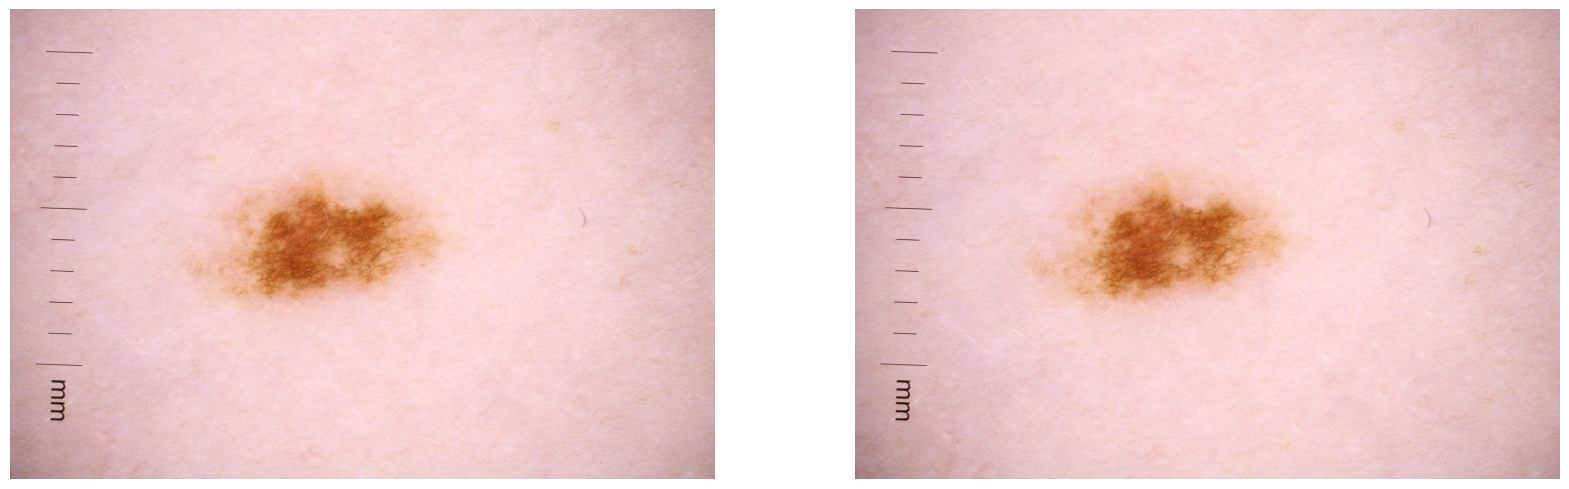

In [49]:
percorso_base = "C:/projects/skcm-gen-data/2020/ISIC_2020_Training_JPEG/train/"
mostra_immagini_per_lesione(isic2020, 'IL_9959009', percorso_base)

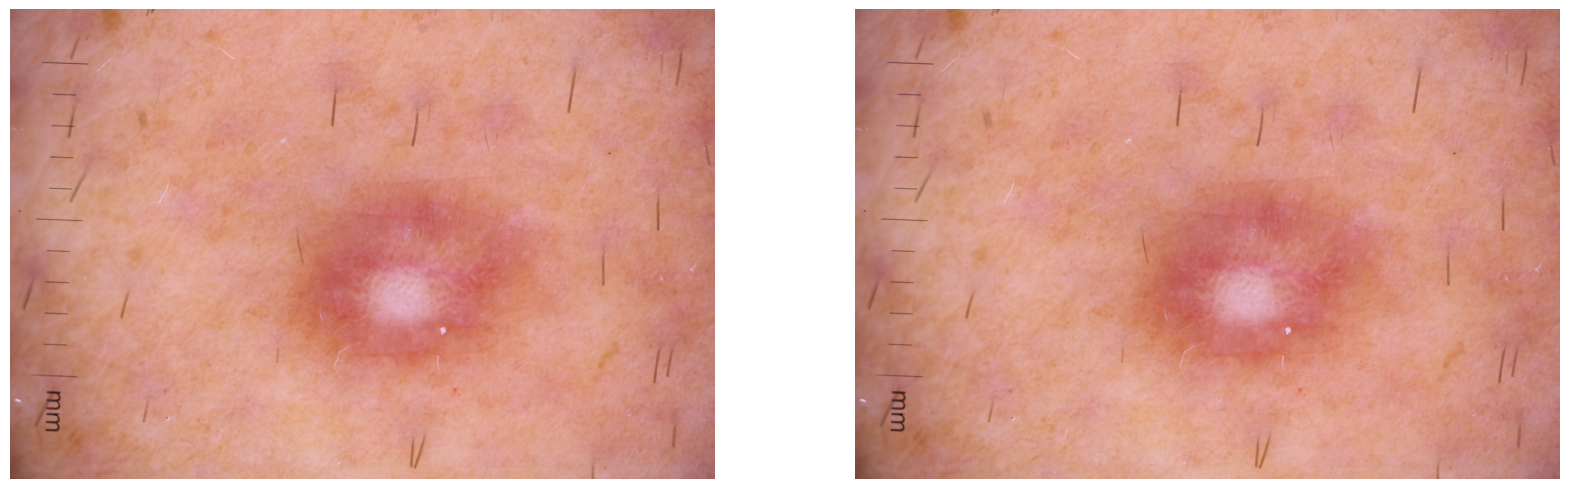

In [50]:
mostra_immagini_per_lesione(isic2020, 'IL_9936570', percorso_base)

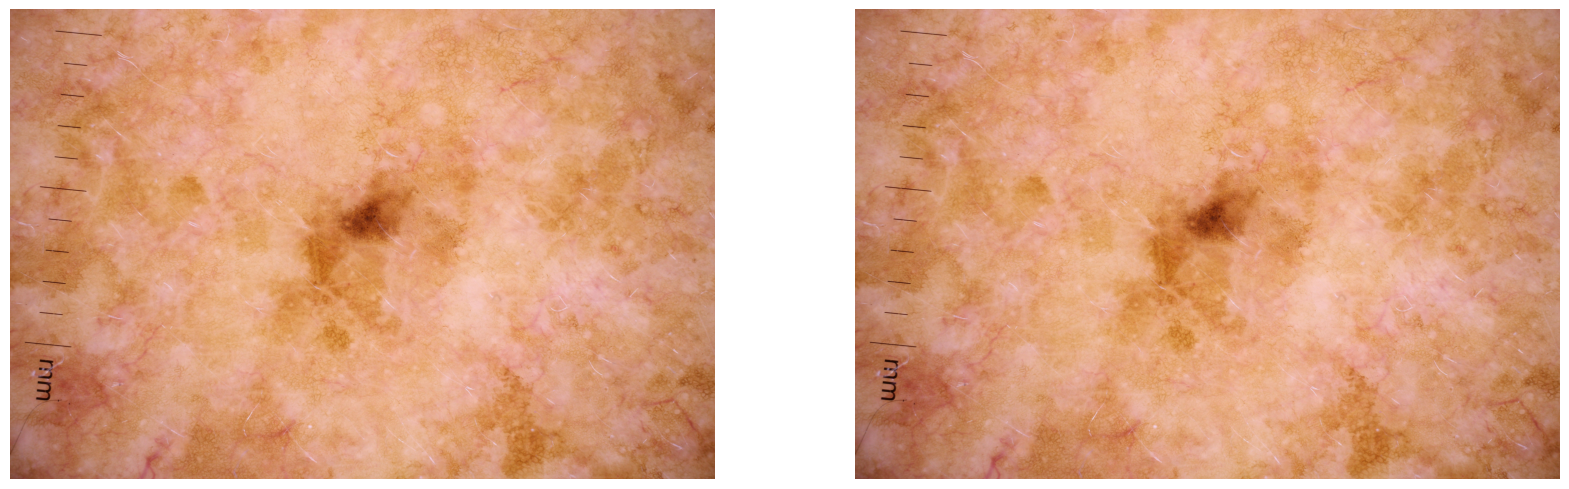

In [51]:
mostra_immagini_per_lesione(isic2020, 'IL_0057914', percorso_base)

Faccio lo stesso tipo di analisi per patient_id: qua le immagini sono ben diverse dati gli stessi patient_id

In [52]:
# Selezionare i primi 2000 elementi
subset = isic2020.iloc[0:2000][['image', 'patient_id']]

# Raggruppare per lesion_id e trovare duplicati
duplicate_lesions = subset.groupby('patient_id')['image'].apply(list)

# Filtrare solo i lesion_id che hanno più di una immagine associata
duplicate_lesions = duplicate_lesions[duplicate_lesions.apply(len) > 1]

# Stampare i risultati
print(duplicate_lesions)

patient_id
IP_0039318           [ISIC_0202167, ISIC_0277320, ISIC_0318642]
IP_0041255                         [ISIC_0413804, ISIC_0686839]
IP_0065733                         [ISIC_0300915, ISIC_0389955]
IP_0085748           [ISIC_0294910, ISIC_0377420, ISIC_0535843]
IP_0093378           [ISIC_0341350, ISIC_0350269, ISIC_0692285]
                                    ...                        
IP_9901629    [ISIC_0592088, ISIC_0612816, ISIC_0615970, ISI...
IP_9906695                         [ISIC_0096201, ISIC_0549531]
IP_9927968           [ISIC_0436964, ISIC_0602529, ISIC_0631689]
IP_9961030                         [ISIC_0411005, ISIC_0437978]
IP_9992027    [ISIC_0460240, ISIC_0508284, ISIC_0553164, ISI...
Name: image, Length: 496, dtype: object


C:\Users\pietro.rossi\AppData\Local\Temp\ipykernel_40472\468831266.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = isic2020.iloc[0:2000][isic2020['patient_id'] == 'IP_9901629']


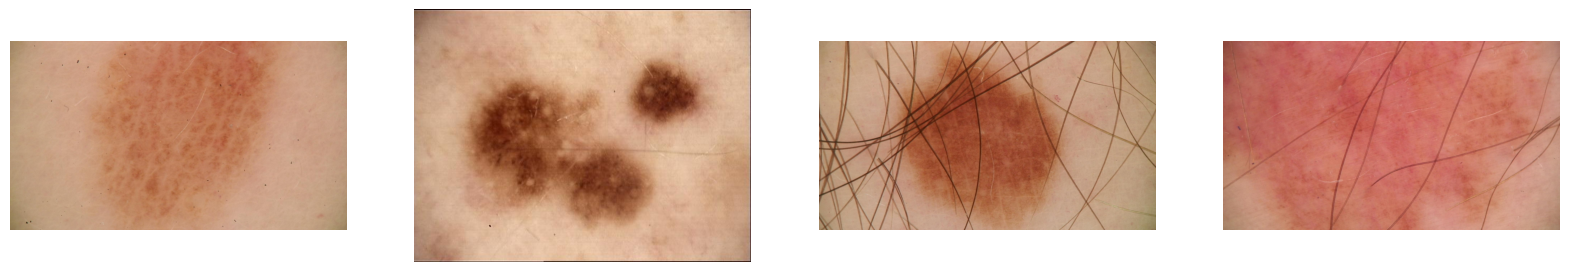

In [53]:
# Filtra il DataFrame per ottenere solo le immagini della lesione specificata
filtered_df = isic2020.iloc[0:2000][isic2020['patient_id'] == 'IP_9901629']
fig, axes = plt.subplots(1, len(filtered_df), figsize=(20, 12))

for ax, image_path in zip(axes, filtered_df['image']):
    img = Image.open(os.path.join("C:/projects/skcm-gen-data/2020/ISIC_2020_Training_JPEG/train/", image_path + '.jpg'))  # Percorso completo
    ax.imshow(img)
    ax.axis('off')  # Rimuove gli assi per una visualizzazione pulita

plt.show()

Abbiamo conferma che le immagini con stesso patient_id fanno riferimento a lesioni diverse ma sullo stesso paziente

#### Adattamento al dataset ISIC 2019 prima di fare il merge

In [54]:
#Verifica che ad ogni traget = 1 è associato l'attributo 'malignant' in benign_malignant
isic2020.loc[isic2020['malignant']==1, 'benign_malignant'].nunique()

1

In [55]:
#Posso rimuovere la colonna benign_malignant, a questo punto ridondante, ricordando che malignant = 1 (come fatto per 2019)
isic2020 = isic2020.drop(columns = 'benign_malignant')

In [56]:
isic2020[isic2020['diagnosis'] == 'cafe-au-lait macule'].shape[0]

1

In [57]:
isic2020['diagnosis'].unique()

array(['unknown', 'nevus', 'melanoma', 'seborrheic keratosis',
       'lentigo NOS', 'lichenoid keratosis', 'solar lentigo',
       'cafe-au-lait macule', 'atypical melanocytic proliferation'],
      dtype=object)

C:\Users\pietro.rossi\AppData\Local\Temp\ipykernel_40472\1814770215.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=isic2020, x='diagnosis', order=isic2020['diagnosis'].value_counts().index, palette='viridis')


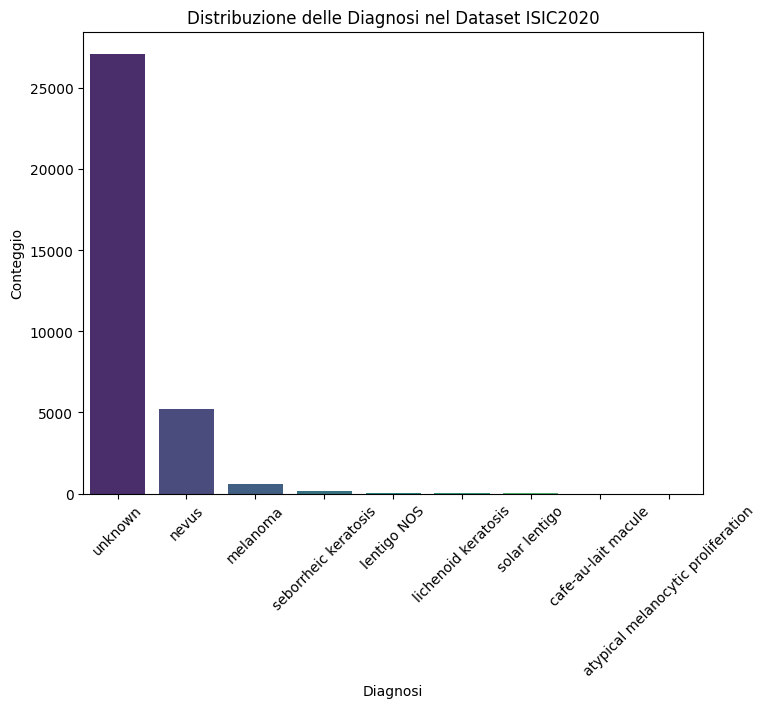

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grafico a barre della distribuzione delle diagnosi
plt.figure(figsize=(8, 6))
sns.countplot(data=isic2020, x='diagnosis', order=isic2020['diagnosis'].value_counts().index, palette='viridis')

# Titoli e etichette
plt.title('Distribuzione delle Diagnosi nel Dataset ISIC2020')
plt.xlabel('Diagnosi')
plt.ylabel('Conteggio')
plt.xticks(rotation=45)  # Ruota le etichette se sono lunghe

# Mostra il grafico
plt.show()


Solo le Lentigo NOS possono evolversi in melanomi!

Seborrheic e lichenoid keratosis, solar lentigo, cafe-au-lait macule NO

In [59]:
sk= isic2020[isic2020['diagnosis'] == 'melanoma']

In [60]:
sk.shape[0]

584

27124 su circa 33000 hanno diagnosis = unknown, in più non sembra essere utile e nel dataset 2019 non esiste come attributo -> via\
Patient_id è presente solo in isic2020 e lo abbiamo analizzato in precedenza -> via anche lui

In [61]:
diagnosi_da_eliminare = ['seborrheic keratosis', 'lichenoid keratosis', 'solar lentigo', 'cafe-au-lait macule']

isic2020_clean = isic2020[~isic2020['diagnosis'].isin(diagnosi_da_eliminare)]

isic2020_clean.shape[0]


32946

In [62]:
isic2020_clean = isic2020_clean.drop(columns = ['diagnosis','patient_id'])

In [63]:
print(isic2020[isic2020['image'] == 'ISIC_5448850']['lesion_id'])
print(isic2020[isic2020['image'] == 'ISIC_9881235']['lesion_id'])

17881    IL_0450121
Name: lesion_id, dtype: object
32735    IL_0450121
Name: lesion_id, dtype: object


## ISIC 2019 & 2020

In [64]:
dataset = pd.concat([isic2019_clean, isic2020_clean], ignore_index=True)
dataset

image  age_approx anatom_site_general   lesion_id     sex  \
0      ISIC_0000000        55.0      anterior torso         NaN  female   
1      ISIC_0000001        30.0      anterior torso         NaN  female   
2      ISIC_0000002        60.0     upper extremity         NaN  female   
3      ISIC_0000003        30.0     upper extremity         NaN    male   
4      ISIC_0000004        80.0     posterior torso         NaN    male   
...             ...         ...                 ...         ...     ...   
50338  ISIC_9999134        50.0               torso  IL_2076932    male   
50339  ISIC_9999320        65.0               torso  IL_6891604    male   
50340  ISIC_9999515        20.0     lower extremity  IL_6364820    male   
50341  ISIC_9999666        50.0     lower extremity  IL_6048457    male   
50342  ISIC_9999806        45.0               torso  IL_5788213    male   

       malignant  
0            0.0  
1            0.0  
2            1.0  
3            0.0  
4            1.0  
...          ...  
50338        0.0  
50339        0.0  
50340        0.0  
50341        0.0  
50342        0.0  

[50343 rows x 6 columns]

In [65]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50343 entries, 0 to 50342
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   image                50343 non-null  object 
 1   age_approx           49873 non-null  float64
 2   anatom_site_general  47601 non-null  object 
 3   lesion_id            48457 non-null  object 
 4   sex                  49926 non-null  object 
 5   malignant            50343 non-null  float64
dtypes: float64(2), object(4)
memory usage: 2.3+ MB


Tutto sommato il numero di missing values sembra limitato rispetto al campione selezionato :)

In [66]:
dataset.to_csv('isic2019_2020.csv', index=False)

In [67]:
#Unendo i dataset, le immagini hanno tutte comunque id diversi 
dataset['image'].nunique()

50343

C:\Users\pietro.rossi\AppData\Local\Temp\ipykernel_40472\2614515147.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='malignant', data=dataset, palette=["#008000", "#FF0000"])


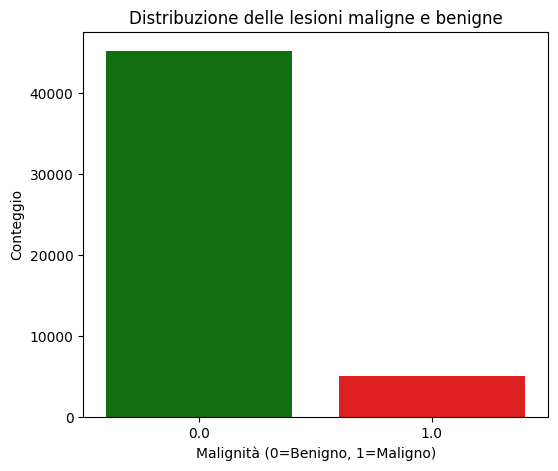

In [68]:
#Frequenza delle lesioni maligne vs benigne
plt.figure(figsize=(6, 5))
sns.countplot(x='malignant', data=dataset, palette=["#008000", "#FF0000"])
plt.title("Distribuzione delle lesioni maligne e benigne")
plt.xlabel("Malignità (0=Benigno, 1=Maligno)")
plt.ylabel("Conteggio")
plt.show()


### Statistiche descrittive

In [69]:
# 1. Statistiche descrittive sull'età
print("Statistiche sull'età:")
print(dataset["age_approx"].describe())

# 2. Conteggio dei sessi
print("\nDistribuzione per sesso:")
print(dataset["sex"].value_counts())

# 3. Distribuzione anatomica
print("\nDistribuzione per area anatomica:")
print(dataset["anatom_site_general"].value_counts())

# 4. Conteggio delle lesioni
lesion_counts = dataset['malignant'].sum()
print("\nNumero di melanomi:", int(lesion_counts))
print("Numero di nei:", int(len(dataset)-lesion_counts))

Statistiche sull'età:
count    49873.000000
mean        48.869328
std         15.426505
min          0.000000
25%         40.000000
50%         50.000000
75%         60.000000
max         90.000000
Name: age_approx, dtype: float64

Distribuzione per sesso:
sex
male      25651
female    24275
Name: count, dtype: int64

Distribuzione per area anatomica:
anatom_site_general
torso              16771
lower extremity    12064
upper extremity     7003
anterior torso      5030
head/neck           3457
posterior torso     2318
palms/soles          744
oral/genital         166
lateral torso         48
Name: count, dtype: int64

Numero di melanomi: 5106
Numero di nei: 45237


#### Sesso

C:\Users\pietro.rossi\AppData\Local\Temp\ipykernel_40472\2090722949.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=dataset, palette="pastel")


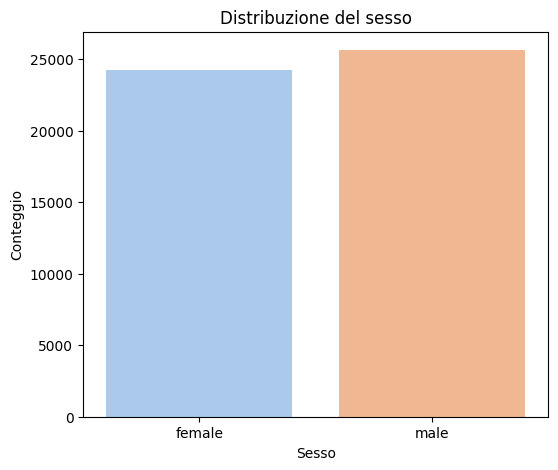

In [70]:
import seaborn as sns

# 2. Distribuzione dei sessi
plt.figure(figsize=(6, 5))
sns.countplot(x='sex', data=dataset, palette="pastel")
plt.title("Distribuzione del sesso")
plt.xlabel("Sesso")
plt.ylabel("Conteggio")
plt.show()


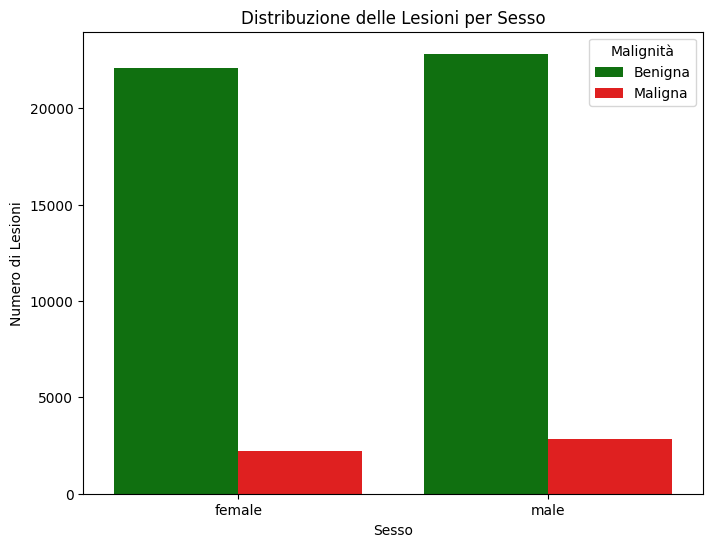

In [71]:
df = dataset

# Crea una colonna per etichettare se la lesione è benigna o maligna
df['malignancy_label'] = df['malignant'].apply(lambda x: 'Maligna' if x == 1 else 'Benigna')

# Grafico a barre per lesioni maligne e benigne per sesso
plt.figure(figsize=(8, 6))
sns.countplot(
    data=df,
    x='sex',
    hue='malignancy_label',
    palette=["#008000", "#FF0000"]  # Verde per Benigno (#008000), Rosso per Maligno (#FF0000)
)
plt.title('Distribuzione delle Lesioni per Sesso')
plt.xlabel('Sesso')
plt.ylabel('Numero di Lesioni')
plt.legend(title="Malignità", labels=["Benigna", "Maligna"])
plt.show()


#### Area anatomica

C:\Users\pietro.rossi\AppData\Local\Temp\ipykernel_40472\148894737.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='anatom_site_general', data=dataset, palette="viridis", order=dataset['anatom_site_general'].value_counts().index)


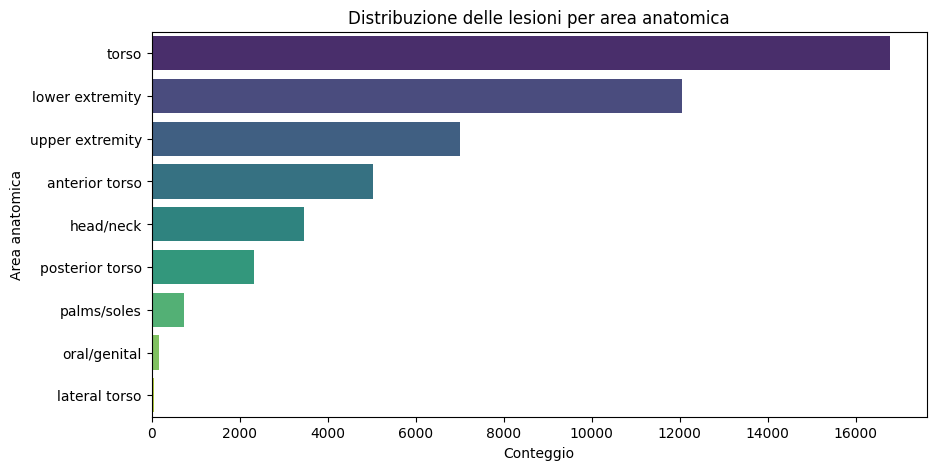

In [72]:
# Distribuzione delle lesioni per area anatomica
plt.figure(figsize=(10, 5))
sns.countplot(y='anatom_site_general', data=dataset, palette="viridis", order=dataset['anatom_site_general'].value_counts().index)
plt.title("Distribuzione delle lesioni per area anatomica")
plt.xlabel("Conteggio")
plt.ylabel("Area anatomica")
plt.show()


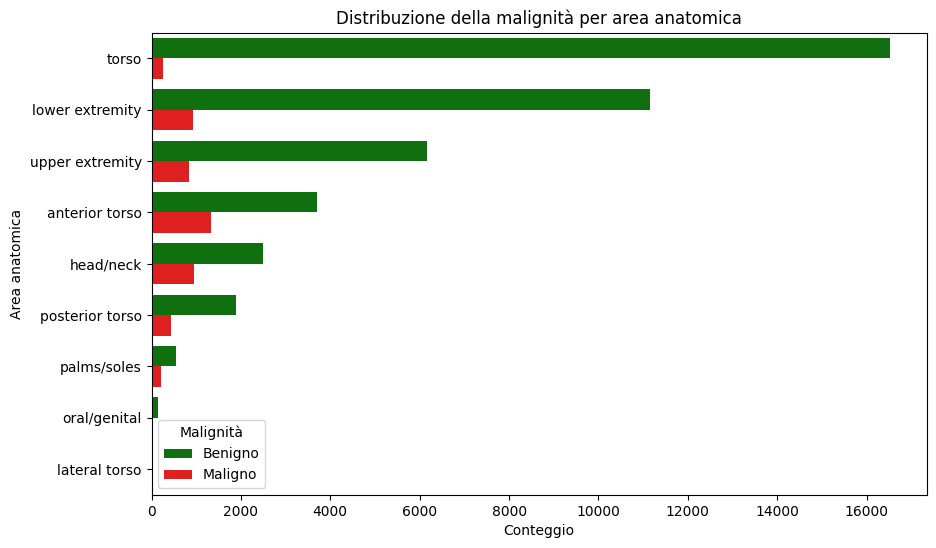

In [73]:

# 6. Relazione tra area anatomica e malignità
plt.figure(figsize=(10, 6))
sns.countplot(
    y='anatom_site_general',
    hue='malignant',
    data=dataset,
    palette=["#008000", "#FF0000"],  # Verde per Benigno (#008000), Rosso per Maligno (#FF0000)
    order=dataset['anatom_site_general'].value_counts().index
)
plt.title("Distribuzione della malignità per area anatomica")
plt.xlabel("Conteggio")
plt.ylabel("Area anatomica")
plt.legend(title="Malignità", labels=["Benigno", "Maligno"])
plt.show()




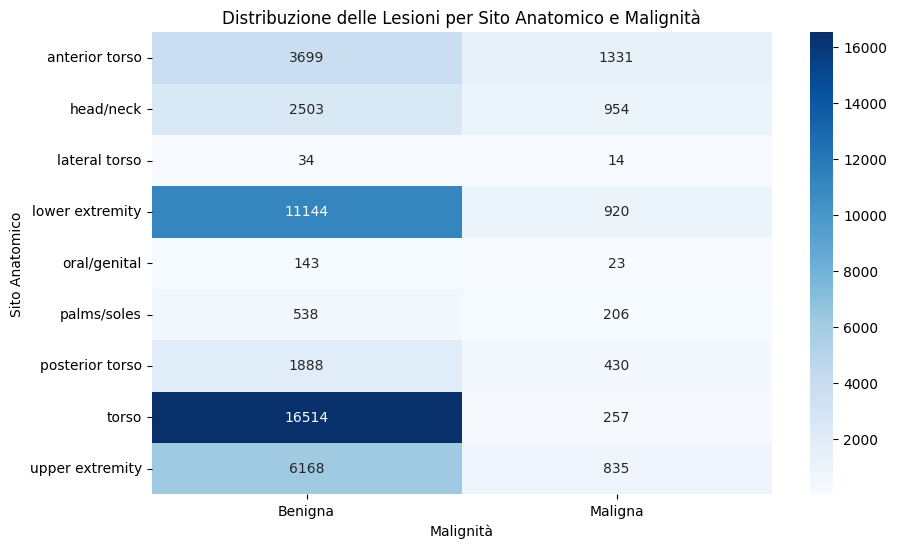

In [74]:
heatmap_data = df.groupby(['anatom_site_general', 'malignancy_label']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='Blues', fmt='d')
plt.title('Distribuzione delle Lesioni per Sito Anatomico e Malignità')
plt.xlabel('Malignità')
plt.ylabel('Sito Anatomico')
plt.show()


#### Età

C:\Users\pietro.rossi\AppData\Local\Temp\ipykernel_40472\2163742648.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='malignant', y='age_approx', data=dataset, palette=["#008000", "#FF0000"])


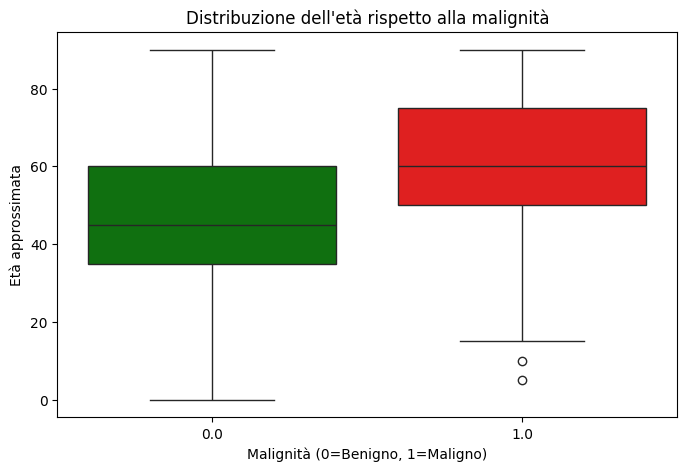

In [75]:
#Distribuzione dell'età rispetto alla malignità
plt.figure(figsize=(8, 5))
sns.boxplot(x='malignant', y='age_approx', data=dataset, palette=["#008000", "#FF0000"])
plt.title("Distribuzione dell'età rispetto alla malignità")
plt.xlabel("Malignità (0=Benigno, 1=Maligno)")
plt.ylabel("Età approssimata")
plt.show()


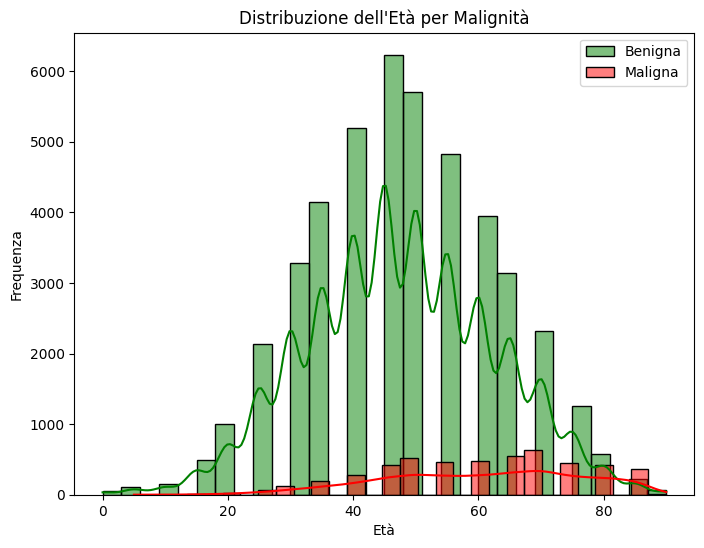

In [76]:
plt.figure(figsize=(8, 6))
sns.histplot(df[df['malignant'] == 0]['age_approx'], kde=True, color='green', bins=30, label='Benigna')
sns.histplot(df[df['malignant'] == 1]['age_approx'], kde=True, color='red', bins=30, label='Maligna')
plt.title('Distribuzione dell\'Età per Malignità')
plt.xlabel('Età')
plt.ylabel('Frequenza')
plt.legend()
plt.show()


#### Cartelle melanomi e benigni

La cartella con tutti i maligni insieme (2019+2020) esiste già: in skcm-gen-data/dati/melanoma. \
Dobbiamo creare la cartella con i benigni filtrati. 

In [150]:
import os
import shutil
import pandas as pd

# === CONFIGURAZIONE ===
# DataFrame filtrato con le immagini benigne (malignant == 0)
# Assumiamo che la colonna con i nomi delle immagini sia 'image'
# ESEMPI: 'ISIC_2019_0000000', 'ISIC_2020_0051234'

df_benign = df[df['malignant'] == 0]
image_list = df_benign['image'].tolist()

# Percorsi di origine (ISIC 2019 e 2020)
src_dirs = [
    r"C:\projects\skcm-gen-data\2019\ISIC_2019_Training_Input\ISIC_2019_Training_Input",
    r"C:\projects\skcm-gen-data\2020\ISIC_2020_Training_JPEG\train"
]

# Percorso di destinazione
dst_dir = r"C:\projects\skcm-gen-data\dati\benigno_full_filtered"
os.makedirs(dst_dir, exist_ok=True)

# === COPIA FILE ===
missing = []
copied = []

for image_id in image_list:
    filename = f"{image_id}.jpg"
    found = False
    for src_dir in src_dirs:
        src_path = os.path.join(src_dir, filename)
        if os.path.exists(src_path):
            dst_path = os.path.join(dst_dir, filename)
            shutil.copy(src_path, dst_path)
            copied.append(filename)
            found = True
            break
    if not found:
        missing.append(filename)

print(f"Copia completata.")
print(f"Immagini copiate: {len(copied)}")
print(f"Immagini non trovate: {len(missing)}")



Copia completata.
Immagini copiate: 45237
Immagini non trovate: 0


## CAMPIONAMENTI Cycle-GAN

Voglio creare due cartelle separate in base al label per il training del cycle-gan

#### 1. Campionamento TOTALMENTE randomico

In [1]:
import os
import shutil
import random

# Funzione per campionamento e copia immagini
def campiona_e_copia(src_folder, dst_train, dst_val, dst_test, n_train=1500, n_val=300, n_test=300):
    images = [f for f in os.listdir(src_folder) if f.endswith(".jpg")]
    random.shuffle(images)
    train_imgs = images[:n_train]
    val_imgs = images[n_train:n_train+n_val]
    test_imgs = images[n_train+n_val:n_train+n_val+n_test]

    os.makedirs(dst_train, exist_ok=True)
    os.makedirs(dst_val, exist_ok=True)
    os.makedirs(dst_test, exist_ok=True)

    for fname in train_imgs:
        shutil.copy(os.path.join(src_folder, fname), os.path.join(dst_train, fname))
    for fname in val_imgs:
        shutil.copy(os.path.join(src_folder, fname), os.path.join(dst_val, fname))
    for fname in test_imgs:
        shutil.copy(os.path.join(src_folder, fname), os.path.join(dst_test, fname))

# Salva i nomi delle immagini selezionate in file txt
def salva_nomi_immagini(folder, file_txt):
    images = [f for f in os.listdir(folder) if f.endswith(".jpg")]
    with open(file_txt, "w") as f:
        for img in images:
            f.write(f"{img}\n")


# === Percorsi principali ===
src_benign_folder = r"C:\projects\skcm-gen-data\dati\benigno_full_filtered"
src_malign_folder = r"C:\projects\skcm-gen-data\dati\melanoma"

dst_base_folder = r"C:\projects\skcm-gen-data\dati"

# Cartelle di destinazione
dst_benign_train = os.path.join(dst_base_folder, "benigno_training")
dst_benign_val = os.path.join(dst_base_folder, "benigno_validation")
dst_benign_test = os.path.join(dst_base_folder, "benigno_test")

dst_malign_train = os.path.join(dst_base_folder, "melanoma_training")
dst_malign_val = os.path.join(dst_base_folder, "melanoma_validation")
dst_malign_test = os.path.join(dst_base_folder, "melanoma_test")

# Campionamento e copia per benigni
campiona_e_copia(src_benign_folder, dst_benign_train, dst_benign_val, dst_benign_test)

# Campionamento e copia per maligni
campiona_e_copia(src_malign_folder, dst_malign_train, dst_malign_val, dst_malign_test)

salva_nomi_immagini(dst_benign_train, os.path.join(dst_base_folder, "benigno_train.txt"))
salva_nomi_immagini(dst_benign_val, os.path.join(dst_base_folder, "benigno_val.txt"))
salva_nomi_immagini(dst_benign_test, os.path.join(dst_base_folder, "benigno_test.txt"))

salva_nomi_immagini(dst_malign_train, os.path.join(dst_base_folder, "melanoma_train.txt"))
salva_nomi_immagini(dst_malign_val, os.path.join(dst_base_folder, "melanoma_val.txt"))
salva_nomi_immagini(dst_malign_test, os.path.join(dst_base_folder, "melanoma_test.txt"))

print("✅ Campionamento e copia completati per train/val/test di entrambe le classi.")

✅ Campionamento e copia completati per train/val/test di entrambe le classi.


In [2]:
import os
import shutil
import random
from pathlib import Path
from typing import List, Tuple

# ----- Config base -----
RANDOM_SEED = 42  # per ripetibilità
EXTS = {".jpg", ".jpeg", ".png"}  # estensioni supportate

random.seed(RANDOM_SEED)

def _list_images(src_folder: str) -> List[str]:
    p = Path(src_folder)
    imgs = [f.name for f in p.iterdir() if f.is_file() and f.suffix.lower() in EXTS]
    return imgs

def _ensure_empty_dir(path: str, clear_if_exists: bool = True):
    if os.path.exists(path):
        if clear_if_exists:
            shutil.rmtree(path)
            os.makedirs(path, exist_ok=True)
        else:
            # se non vuoi cancellare, almeno assicurati che sia vuota
            if any(Path(path).iterdir()):
                raise RuntimeError(f"La cartella di destinazione non è vuota: {path}")
    else:
        os.makedirs(path, exist_ok=True)

def _split_indices(n_total: int, n_train: int, n_val: int, n_test: int) -> Tuple[List[int], List[int], List[int]]:
    if n_train + n_val + n_test > n_total:
        raise ValueError(
            f"Richieste {n_train+n_val+n_test} immagini ma disponibili solo {n_total}."
        )
    idxs = list(range(n_total))
    random.shuffle(idxs)
    i_tr = idxs[:n_train]
    i_val = idxs[n_train:n_train+n_val]
    i_te = idxs[n_train+n_val:n_train+n_val+n_test]
    return i_tr, i_val, i_te

def campiona_e_copia(
    src_folder: str,
    dst_train: str,
    dst_val: str,
    dst_test: str,
    n_train: int = 1500,
    n_val: int = 300,
    n_test: int = 300,
    clear_destinations: bool = True,
) -> Tuple[List[str], List[str], List[str]]:
    images = _list_images(src_folder)
    n_total = len(images)
    if n_total == 0:
        raise FileNotFoundError(f"Nessuna immagine trovata in {src_folder} con estensioni {sorted(EXTS)}.")

    # split
    i_tr, i_val, i_te = _split_indices(n_total, n_train, n_val, n_test)
    train_imgs = [images[i] for i in i_tr]
    val_imgs = [images[i] for i in i_val]
    test_imgs = [images[i] for i in i_te]

    # prepara destinazioni (pulizia opzionale)
    _ensure_empty_dir(dst_train, clear_if_exists=clear_destinations)
    _ensure_empty_dir(dst_val, clear_if_exists=clear_destinations)
    _ensure_empty_dir(dst_test, clear_if_exists=clear_destinations)

    # copia
    for fname in train_imgs:
        shutil.copy2(os.path.join(src_folder, fname), os.path.join(dst_train, fname))
    for fname in val_imgs:
        shutil.copy2(os.path.join(src_folder, fname), os.path.join(dst_val, fname))
    for fname in test_imgs:
        shutil.copy2(os.path.join(src_folder, fname), os.path.join(dst_test, fname))

    return train_imgs, val_imgs, test_imgs

def salva_nomi_immagini(nomi: List[str], file_txt: str, absolute: bool = False, root: str = None):
    with open(file_txt, "w", encoding="utf-8") as f:
        for img in nomi:
            if absolute and root is not None:
                f.write(str(Path(root) / img) + "\n")
            else:
                f.write(f"{img}\n")

# === Percorsi principali ===
src_benign_folder = r"C:\projects\skcm-gen-data\dati\benigno_full_filtered"
src_malign_folder = r"C:\projects\skcm-gen-data\dati\melanoma"

dst_base_folder = r"C:\projects\skcm-gen-data\dati"

# Cartelle di destinazione
dst_benign_train = os.path.join(dst_base_folder, "benigno_training")
dst_benign_val = os.path.join(dst_base_folder, "benigno_validation")
dst_benign_test = os.path.join(dst_base_folder, "benigno_test")

dst_malign_train = os.path.join(dst_base_folder, "melanoma_training")
dst_malign_val = os.path.join(dst_base_folder, "melanoma_validation")
dst_malign_test = os.path.join(dst_base_folder, "melanoma_test")

# ---- Esecuzione ----
# Benigni
ben_tr, ben_val, ben_te = campiona_e_copia(
    src_benign_folder, dst_benign_train, dst_benign_val, dst_benign_test,
    n_train=1500, n_val=300, n_test=300, clear_destinations=True
)

# Maligni
mel_tr, mel_val, mel_te = campiona_e_copia(
    src_malign_folder, dst_malign_train, dst_malign_val, dst_malign_test,
    n_train=1500, n_val=300, n_test=300, clear_destinations=True
)

# Salva i nomi (qui salvo i nomi relativi; metti absolute=True e root=... per percorsi assoluti)
salva_nomi_immagini(ben_tr, os.path.join(dst_base_folder, "benigno_train.txt"))
salva_nomi_immagini(ben_val, os.path.join(dst_base_folder, "benigno_val.txt"))
salva_nomi_immagini(ben_te, os.path.join(dst_base_folder, "benigno_test.txt"))

salva_nomi_immagini(mel_tr, os.path.join(dst_base_folder, "melanoma_train.txt"))
salva_nomi_immagini(mel_val, os.path.join(dst_base_folder, "melanoma_val.txt"))
salva_nomi_immagini(mel_te, os.path.join(dst_base_folder, "melanoma_test.txt"))

print("✅ Campionamento e copia completati per train/val/test di entrambe le classi.")


✅ Campionamento e copia completati per train/val/test di entrambe le classi.


#### 2. Campionamento randomico con deduplicazione

In [1]:
#np.save("benigno_features.npy", features)

In [6]:
import pickle

with open("melanoma_paths.pkl", "rb") as f:
    melanoma_paths = pickle.load(f)

print(len(melanoma_paths))

5106


MELANOMA

In [7]:
import os
import shutil
import random
from PIL import Image
import torch
import numpy as np
from torchvision import models, transforms
from sklearn.metrics.pairwise import cosine_distances
from tqdm import tqdm

# === Percorsi ===
# src: immagini originali melanoma
# dst: destinazione immagini splittate in training, validation, test
src_folder = r"C:\projects\skcm-gen-data\dati\melanoma"
dst_train = r"C:\projects\skcm-gen-data\dati\melanoma_training"
dst_val = r"C:\projects\skcm-gen-data\dati\melanoma_validation"
dst_test = r"C:\projects\skcm-gen-data\dati\melanoma_test"

os.makedirs(dst_train, exist_ok=True)
os.makedirs(dst_val, exist_ok=True)
os.makedirs(dst_test, exist_ok=True)

# === Modello per feature extraction ===
# estrazione delle features con ResNet50 pre-addestrato
# commento in quanto è già stato eseguito e sono state salvate in melanoma_features.npy
# device = "cuda" if torch.cuda.is_available() else "cpu"
# model = models.resnet50(pretrained=True)
# feature_extractor = torch.nn.Sequential(*list(model.children())[:-1]).to(device).eval()

# transform = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.ToTensor(),
#     transforms.Normalize([0.485, 0.456, 0.406],
#                          [0.229, 0.224, 0.225]),
# ])

# === Estrazione feature ===
# def get_feature_vector(img_path):
#     try:
#         image = Image.open(img_path).convert("RGB")
#         tensor = transform(image).unsqueeze(0).to(device)
#         with torch.no_grad():
#             vec = feature_extractor(tensor).squeeze().cpu().numpy()
#         return vec
#     except Exception as e:
#         print(f"Errore: {img_path} — {e}")
#         return None

# image_paths = [os.path.join(src_folder, f) for f in os.listdir(src_folder) if f.endswith(".jpg")]
# features = []
# valid_paths = []

# for path in tqdm(image_paths, desc="Estrai feature"):
#     vec = get_feature_vector(path)
#     if vec is not None:
#         features.append(vec)
#         valid_paths.append(path)

# features = np.array(features)

# Usa le features salvate in melanoma_features.npy
features = np.load("melanoma_features.npy")
valid_paths = melanoma_paths  #runnare la cella sopra

# === Deduplicazione (cosine sim < soglia) ===
threshold = 0.05  # distanza bassa = quasi duplicati
unique_indices = []  #raccoglie gli indici non duplicati
used = set() #tiene traccia degli indici già considerati duplicati

for i in tqdm(range(len(features)), desc="Deduplicazione"):
    if i in used:  
        continue   # se l'immagine è già stata segnata come duplicata (used), la salta
    unique_indices.append(i)   # L'immagine corrente è considerata unica → si aggiunge al risultato
    dists = cosine_distances([features[i]], features)[0]   # distanza del coseno tra l'immagine i e tutte le altre
    for j, d in enumerate(dists):
        if d < threshold:
            used.add(j)     #Scorre le distanze: se d < 0.05, l'indice j è considerato duplicato → si aggiunge a used

selected_paths = [valid_paths[i] for i in unique_indices]   # recupera i percorsi dei file (immagini) non duplicati, usando gli indici unici

# === Split randomico non sovrapposto ===
random.shuffle(selected_paths)
n_total = len(selected_paths)
n_train = 1500
n_val = 300
n_test = 300

train_paths = selected_paths[:n_train]
val_paths = selected_paths[n_train:n_train + n_val]
test_paths = selected_paths[n_train + n_val:n_train + n_val + n_test]

# === Copia immagini ===
def copy_images(img_paths, dst_folder):
    for path in tqdm(img_paths, desc=f"Copia in {os.path.basename(dst_folder)}"):
        shutil.copy(path, os.path.join(dst_folder, os.path.basename(path)))

copy_images(train_paths, dst_train)
copy_images(val_paths, dst_val)
copy_images(test_paths, dst_test)

print(f"✅ Copia completata: {len(train_paths)} train, {len(val_paths)} val, {len(test_paths)} test")


Copia in melanoma_test: 100%|██████████| 300/300 [00:01<00:00, 179.70it/s]

✅ Copia completata: 1500 train, 300 val, 300 test


In [ ]:
#np.save("melanoma_features.npy", features)

BENIGNO

In [3]:
import pickle

with open("benigno_paths.pkl", "rb") as f:
    benigno_paths = pickle.load(f)

print(len(benigno_paths))

45237


In [4]:
import os
import shutil
import random
from PIL import Image
import torch
import numpy as np
from torchvision import models, transforms
from sklearn.metrics.pairwise import cosine_distances
from tqdm import tqdm

# === Percorsi ===
src_folder = r"C:\projects\skcm-gen-data\dati\benigno_full_filtered"
dst_train = r"C:\projects\skcm-gen-data\dati\benigno_training"
dst_val = r"C:\projects\skcm-gen-data\dati\benigno_validation"
dst_test = r"C:\projects\skcm-gen-data\dati\benigno_test"

os.makedirs(dst_train, exist_ok=True)
os.makedirs(dst_val, exist_ok=True)
os.makedirs(dst_test, exist_ok=True)


"""
# === Modello per feature extraction ===
device = "cuda" if torch.cuda.is_available() else "cpu"
model = models.resnet50(pretrained=True)
feature_extractor = torch.nn.Sequential(*list(model.children())[:-1]).to(device).eval()

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225]),
])


Commentato in quanto le feature sono già state calcolate e salvate in benigno_features.npy

# === Estrazione feature ===
def get_feature_vector(img_path):
    try:
        image = Image.open(img_path).convert("RGB")
        tensor = transform(image).unsqueeze(0).to(device)
        with torch.no_grad():
            vec = feature_extractor(tensor).squeeze().cpu().numpy()
        return vec
    except Exception as e:
        print(f"Errore: {img_path} — {e}")
        return None

# image_paths = [os.path.join(src_folder, f) for f in os.listdir(src_folder) if f.endswith(".jpg")]
# features = []
# valid_paths = []
#
# for path in tqdm(image_paths, desc="Estrai feature"):
#     vec = get_feature_vector(path)
#     if vec is not None:
#         features.append(vec)
#         valid_paths.append(path)
#
# features = np.array(features)
"""
valid_paths = benigno_paths  # Usa i path già caricati
features = np.load("benigno_features.npy")  # Usa le feature già calcolate


# === Deduplicazione (cosine sim < soglia) con avanzamento ===
threshold = 0.05  # distanza bassa = quasi duplicati
unique_indices = []
used = set()

for i in tqdm(range(len(features)), desc="Deduplicazione"):
    if i in used:
        continue
    unique_indices.append(i)
    dists = cosine_distances([features[i]], features)[0]
    for j, d in enumerate(dists):
        if d < threshold:
            used.add(j)

selected_paths = [valid_paths[i] for i in unique_indices]

# === Split randomico non sovrapposto ===
random.shuffle(selected_paths)
n_total = len(selected_paths)
n_train = 1500
n_val = 300
n_test = 300

train_paths = selected_paths[:n_train]
val_paths = selected_paths[n_train:n_train + n_val]
test_paths = selected_paths[n_train + n_val:n_train + n_val + n_test]

# === Copia immagini con avanzamento ===

def copy_images(img_paths, dst_folder):
    for path in tqdm(img_paths, desc=f"Copia in {os.path.basename(dst_folder)}"):
        shutil.copy(path, os.path.join(dst_folder, os.path.basename(path)))

copy_images(train_paths, dst_train)
copy_images(val_paths, dst_val)
copy_images(test_paths, dst_test)

print(f"✅ Copia completata: {len(train_paths)} train, {len(val_paths)} val, {len(test_paths)} test")


Copia in benigno_test: 100%|██████████| 300/300 [00:02<00:00, 141.09it/s]

✅ Copia completata: 1500 train, 300 val, 300 test


Salvataggio in un txt delle immagini estratte per cartella

In [8]:
import os

# Base directory dove si trovano le cartelle create
base_dir = r"C:\projects\skcm-gen-data\dati"

# Nomi delle cartelle da cui estrarre gli ID delle immagini
cartelle = [
    "melanoma_training",
    "melanoma_validation",
    "melanoma_test",
    "benigno_training",
    "benigno_validation",
    "benigno_test"
]

# Per ogni cartella, salva un file .txt con i nomi delle immagini
for nome_cartella in cartelle:
    cartella_path = os.path.join(base_dir, nome_cartella)
    if not os.path.exists(cartella_path):
        print(f"❌ Cartella non trovata: {cartella_path}")
        continue

    immagini = [f for f in os.listdir(cartella_path) if f.endswith(".jpg")]
    immagini.sort()

    output_file = os.path.join(base_dir, f"{nome_cartella}_ids.txt")
    with open(output_file, "w") as f:
        for img in immagini:
            f.write(f"{img}\n")

    print(f"✅ Salvati {len(immagini)} ID in: {output_file}")


✅ Salvati 1500 ID in: C:\projects\skcm-gen-data\dati\melanoma_training_ids.txt
✅ Salvati 300 ID in: C:\projects\skcm-gen-data\dati\melanoma_validation_ids.txt
✅ Salvati 300 ID in: C:\projects\skcm-gen-data\dati\melanoma_test_ids.txt
✅ Salvati 1500 ID in: C:\projects\skcm-gen-data\dati\benigno_training_ids.txt
✅ Salvati 300 ID in: C:\projects\skcm-gen-data\dati\benigno_validation_ids.txt
✅ Salvati 300 ID in: C:\projects\skcm-gen-data\dati\benigno_test_ids.txt


#### 3. KMeans clustering per individuare immagini centrali o prototipiche

In [1]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
print("Torch version:", torch.__version__)
print(torch.cuda.is_available())  # Deve restituire True per usare la GPU


cuda
Torch version: 2.7.1+cu128
True


In [10]:
import os
import pickle
import torch
from torchvision import models, transforms
from PIL import Image
from tqdm import tqdm
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

# === CONFIG ===
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
print("Torch version:", torch.__version__)
n_select = 1500
n_clusters = 100

path_melanoma = r"C:\projects\skcm-gen-data\dati\melanoma"
path_benigno = r"C:\projects\skcm-gen-data\dati\benigno_full_filtered"

# === CARICAMENTO MODELLO RESNET50 ===
resnet = models.resnet50(pretrained=True)
feature_extractor = torch.nn.Sequential(*list(resnet.children())[:-1])
feature_extractor.to(device)
feature_extractor.eval()

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225]),
])

# === FUNZIONE ESTRAZIONE FEATURE ===
def extract_features(image_paths):
    features = []
    valid_paths = []
    for path in tqdm(image_paths, desc="Extracting features"):
        try:
            img = Image.open(path).convert("RGB")
            tensor = transform(img).unsqueeze(0).to(device)
            with torch.no_grad():
                feat = feature_extractor(tensor).squeeze().cpu().numpy()
            features.append(feat)
            valid_paths.append(path)
        except Exception as e:
            print(f"Errore: {path} - {e}")
    return np.vstack(features), valid_paths

# === FUNZIONE SELEZIONE CON KMEANS ===
def select_representative(image_paths, features, n_select=1500, n_clusters=100):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(features)
    closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, features)
    selected = [image_paths[i] for i in closest]

    if len(selected) < n_select:
        distances = np.linalg.norm(features - kmeans.cluster_centers_[kmeans.labels_], axis=1)
        idx_sorted = np.argsort(distances)
        extra = [image_paths[i] for i in idx_sorted if image_paths[i] not in selected][:n_select - len(selected)]
        selected.extend(extra)

    return selected[:n_select]

# === ELENCHI DI IMMAGINI ===
mel_paths = [os.path.join(path_melanoma, f) for f in os.listdir(path_melanoma) if f.endswith(".jpg")]
ben_paths = [os.path.join(path_benigno, f) for f in os.listdir(path_benigno) if f.endswith(".jpg")]

# === ESECUZIONE PER MELANOMA ===
mel_features, mel_valid = extract_features(mel_paths)
#mel_features = np.load("melanoma_features.npy")
#with open("melanoma_paths.pkl", "rb") as f:
#    mel_valid = pickle.load(f)

mel_selected = select_representative(mel_valid, mel_features, n_select=n_select)

# === ESECUZIONE PER BENIGNI ===
#ben_features = np.load("benigno_features.npy")
#with open("benigno_paths.pkl", "rb") as f:
#    ben_valid = pickle.load(f)
ben_features, ben_valid = extract_features(ben_paths)

ben_selected = select_representative(ben_valid, ben_features, n_select=n_select)

# Salva le feature estratte
np.save("melanoma_features_resnet50.npy", mel_features)
np.save("benigno_features_resnet50.npy", ben_features)

# Salva i path validi
with open("melanoma_path_resnet50.pkl", "wb") as f:
    pickle.dump(mel_valid, f)
with open("benigno_path_resnet50.pkl", "wb") as f:
    pickle.dump(ben_valid, f)

# === SALVA LISTE SU FILE ===
with open("selected_melanoma.txt", "w") as f:
    for path in mel_selected:
        f.write(f"{os.path.basename(path)}\n")

with open("selected_benigno.txt", "w") as f:
    for path in ben_selected:
        f.write(f"{os.path.basename(path)}\n")

print(f"\nSelezione completata: {len(mel_selected)} melanoma e {len(ben_selected)} benigni.")




cuda
Torch version: 2.7.1+cu128


Extracting features: 100%|██████████| 45237/45237 [1:26:56<00:00,  8.67it/s]



Selezione completata: 1500 melanoma e 1500 benigni.


Versione nuova con HTML e elbow/silhouette

In [ ]:
import os
import pickle
import math
import csv
import numpy as np
from PIL import Image
import shutil
from collections import Counter
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 (attiva il 3D)
from sklearn.cluster import MiniBatchKMeans

# === opzionali ma consigliati: installa se mancano ===
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

# --------------------------
# Config
# --------------------------
N_CLUSTERS = 5            # verrà sovrascritto dopo la valutazione globale
USE_TSNE = False          # True per t-SNE (più lento ma spesso separa meglio)
TSNE_SAMPLE = None        # es. 8000 per campionare max N punti in t-SNE
SEED = 42

OUTDIR = "cluster_outputs"
os.makedirs(OUTDIR, exist_ok=True)

# --------------------------
# Utils: valutazione k
# --------------------------
def _kneedle_elbow(k_values, inertias):
    """
    Stima 'gomito' con metodo distanza massima dalla retta (primo->ultimo punto).
    Restituisce k che massimizza la distanza normalizzata.
    """
    k = np.array(k_values, dtype=float)
    y = np.array(inertias, dtype=float)

    # punti estremi
    x1, y1 = k[0], y[0]
    x2, y2 = k[-1], y[-1]

    # vettore della retta
    dx, dy = x2 - x1, y2 - y1
    denom = np.hypot(dx, dy)
    if denom == 0:
        return int(k_values[np.argmin(y)])  # fallback

    # distanza perpendicolare punto-linea
    dist = np.abs(dy * (k - x1) - dx * (y - y1)) / denom
    idx = int(np.argmax(dist))
    return int(k_values[idx])

def evaluate_k(features,
               k_values,
               seed=42,
               outdir="cluster_outputs",
               prefix="ALL",
               sil_sample=None,
               pca_dim=None):
    """
    Valuta k con Inertia (Elbow) e Silhouette.
    - pca_dim=50 per velocità su embedding alti.
    - sil_sample=None => usa tutti i punti (ok ~10k).
    """
    os.makedirs(outdir, exist_ok=True)

    X = features
    if pca_dim is not None and pca_dim < features.shape[1]:
        X = PCA(n_components=pca_dim, random_state=seed).fit_transform(features)

    # campionamento silhouette (se richiesto)
    rng = np.random.RandomState(seed)
    if sil_sample is not None and len(X) > sil_sample:
        sil_idx = rng.choice(len(X), size=sil_sample, replace=False)
        X_sil = X[sil_idx]
    else:
        X_sil = X

    inertias, silhouettes = [], []
    for k in k_values:
        km = KMeans(n_clusters=k, random_state=seed, n_init=10)
        labels = km.fit_predict(X)
        inertias.append(km.inertia_)

        if X_sil is X:
            sil = silhouette_score(X, labels, metric="euclidean")
        else:
            # assegna cluster ai soli campioni via centroidi
            d = ((X_sil[:, None, :] - km.cluster_centers_[None, :, :])**2).sum(axis=2)
            labels_sil = np.argmin(d, axis=1)
            sil = silhouette_score(X_sil, labels_sil, metric="euclidean")
        silhouettes.append(sil)

        print(f"[k={k:>3}] inertia={inertias[-1]:.3e}  silhouette={sil:.4f}")

    # Salva CSV
    df = pd.DataFrame({"k": k_values, "inertia": inertias, "silhouette": silhouettes})
    csv_path = os.path.join(outdir, f"{prefix}_k_eval.csv")
    df.to_csv(csv_path, index=False)
    print(f"[CSV]  {csv_path}")

    # Plot Elbow
    plt.figure(figsize=(7,5))
    plt.plot(k_values, inertias, marker="o")
    plt.xlabel("k")
    plt.ylabel("Inertia (somma distanze intra-cluster)")
    plt.title(f"Elbow – {prefix}")
    plt.grid(True, alpha=0.3)
    elbow_png = os.path.join(outdir, f"{prefix}_elbow.png")
    plt.tight_layout(); plt.savefig(elbow_png, dpi=160); plt.close()
    print(f"[PNG]  {elbow_png}")

    # Plot Silhouette
    plt.figure(figsize=(7,5))
    plt.plot(k_values, silhouettes, marker="o")
    plt.xlabel("k")
    plt.ylabel("Silhouette score")
    plt.title(f"Silhouette – {prefix} (n={len(X_sil)})")
    plt.grid(True, alpha=0.3)
    sil_png = os.path.join(outdir, f"{prefix}_silhouette.png")
    plt.tight_layout(); plt.savefig(sil_png, dpi=160); plt.close()
    print(f"[PNG]  {sil_png}")

    # Suggerimenti automatici
    k_elbow = _kneedle_elbow(k_values, inertias)
    k_sil = int(df.loc[df["silhouette"].idxmax(), "k"])
    print(f"\nSuggerimenti: k_elbow={k_elbow} | k_silhouette={k_sil}")

    return df, k_elbow, k_sil

# --------------------------
# Utils: clustering & visual
# --------------------------
def clusterize(features, n_clusters=N_CLUSTERS, seed=SEED):
    kmeans = KMeans(n_clusters=n_clusters, random_state=seed, n_init=10)
    labels = kmeans.fit_predict(features)
    return kmeans, labels

def embed_2d(features, use_tsne=USE_TSNE, seed=SEED, tsne_sample=TSNE_SAMPLE):
    X = features
    if use_tsne:
        # opzionale: campiona per velocizzare
        if tsne_sample is not None and len(X) > tsne_sample:
            idx = np.random.RandomState(seed).choice(len(X), size=tsne_sample, replace=False)
            X = X[idx]
            subset_idx = idx
        else:
            subset_idx = np.arange(len(X))

        # PCA->TSNE per stabilità/velocità
        X50 = PCA(n_components=min(50, X.shape[1]), random_state=seed).fit_transform(X)
        X2_sub = TSNE(n_components=2, init='pca', perplexity=30, random_state=seed).fit_transform(X50)

        # Rimappa su tutti i punti (se campionati, proietta gli altri con PCA 2D)
        if len(X) != len(features):
            # PCA 2D per tutti come fallback (non identico a t-SNE ma coerente visivamente)
            X2_all = PCA(n_components=2, random_state=seed).fit_transform(features)
            X2_all[subset_idx] = X2_sub
            return X2_all
        else:
            return X2_sub
    else:
        return PCA(n_components=2, random_state=seed).fit_transform(features)
    


def embed_3d(features, use_tsne=False, seed=42, tsne_sample=None):
    """
    Restituisce un embedding 3D (np.ndarray shape [n,3]).
    - use_tsne=False => PCA(3)
    - use_tsne=True  => t-SNE(3) con eventuale campionamento e pre-PCA(50) per stabilità
    """
    X = features
    if not use_tsne:
        return PCA(n_components=3, random_state=seed).fit_transform(X)

    # t-SNE 3D
    if tsne_sample is not None and len(X) > tsne_sample:
        rng = np.random.RandomState(seed)
        idx = rng.choice(len(X), size=tsne_sample, replace=False)
        X_sub = X[idx]
        X50 = PCA(n_components=min(50, X.shape[1]), random_state=seed).fit_transform(X_sub)
        X3_sub = TSNE(n_components=3, init='pca', perplexity=30, random_state=seed).fit_transform(X50)

        # proiezione fallback per i non campionati: PCA(3)
        X3_all = PCA(n_components=3, random_state=seed).fit_transform(X)
        X3_all[idx] = X3_sub
        return X3_all
    else:
        X50 = PCA(n_components=min(50, X.shape[1]), random_state=seed).fit_transform(X)
        return TSNE(n_components=3, init='pca', perplexity=30, random_state=seed).fit_transform(X50)


def interactive_scatter(X2, labels, paths, out_html, title="Cluster embedding (2D)"):
    df = pd.DataFrame({
        "x": X2[:,0],
        "y": X2[:,1],
        "cluster": labels.astype(int),
        "file": [os.path.basename(p) for p in paths],
        "path": paths
    })
    fig = px.scatter(
        df, x="x", y="y", color="cluster",
        hover_data=["file", "path"],
        title=title
    )
    fig.update_traces(marker=dict(size=6, opacity=0.85))
    fig.write_html(out_html, include_plotlyjs='cdn')
    print(f"[HTML] {out_html}")


def interactive_scatter3d(X3, labels, paths, out_html, title="Cluster embedding (3D)"):
    df = pd.DataFrame({
        "x": X3[:,0], "y": X3[:,1], "z": X3[:,2],
        "cluster": labels.astype(int),
        "file": [os.path.basename(p) for p in paths],
        "path": paths
    })
    fig = px.scatter_3d(
        df, x="x", y="y", z="z", color="cluster",
        hover_data=["file", "path"], title=title
    )
    fig.update_traces(marker=dict(size=3, opacity=0.85))
    fig.write_html(out_html, include_plotlyjs='cdn')
    print(f"[HTML] {out_html}")


def static_scatter(X2, labels, out_png, title="Clusters (2D)"):
    plt.figure(figsize=(10, 8))
    plt.scatter(X2[:,0], X2[:,1], c=labels, s=6, alpha=0.75, cmap='tab20')
    plt.title(title)
    plt.xticks([]); plt.yticks([])
    plt.tight_layout()
    plt.savefig(out_png, dpi=160)
    plt.close()
    print(f"[PNG]  {out_png}")


def static_scatter3d(X3, labels, out_png, title="Clusters (3D)"):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    sc = ax.scatter(X3[:,0], X3[:,1], X3[:,2], c=labels, s=6, alpha=0.75, cmap='tab20')
    ax.set_title(title)
    ax.set_xticks([]); ax.set_yticks([]); ax.set_zticks([])
    plt.tight_layout()
    plt.savefig(out_png, dpi=160)
    plt.close()
    print(f"[PNG]  {out_png}")


def save_cluster_csv(paths, labels, out_csv):
    with open(out_csv, "w", newline="", encoding="utf-8") as f:
        w = csv.writer(f)
        w.writerow(["filename", "cluster", "fullpath"])
        for p, l in zip(paths, labels):
            w.writerow([os.path.basename(p), int(l), p])
    print(f"[CSV]  {out_csv}")

def save_cluster_grid(paths, labels, cluster_id, out_dir, thumb_size=96, max_imgs=25, cols=5):
    os.makedirs(out_dir, exist_ok=True)
    sel = [p for p, l in zip(paths, labels) if l == cluster_id][:max_imgs]
    if not sel:
        return None
    rows = math.ceil(len(sel) / cols)
    grid = Image.new("RGB", (cols*thumb_size, rows*thumb_size), (255,255,255))
    for i, p in enumerate(sel):
        try:
            im = Image.open(p).convert("RGB")
            im = im.resize((thumb_size, thumb_size))
            r, c = divmod(i, cols)
            grid.paste(im, (c*thumb_size, r*thumb_size))
        except Exception as e:
            print("Errore thumbnail:", p, e)
    out_path = os.path.join(out_dir, f"cluster_{cluster_id:03d}.jpg")
    grid.save(out_path, quality=90)
    return out_path

def export_all_grids(paths, labels, out_dir, thumb_size=96, max_imgs=25, cols=5):
    uniq = np.unique(labels)
    made = []
    for cid in uniq:
        p = save_cluster_grid(paths, labels, cid, out_dir, thumb_size, max_imgs, cols)
        if p:
            made.append(p)
    print(f"[GRIDS] {out_dir} (tot={len(made)})")


def _allocate_counts(total, cluster_sizes):
    """
    Alloca 'total' elementi ai cluster proporzionalmente alle loro dimensioni,
    garantendo la somma esatta con rounding "largest remainder".
    """
    sizes = np.array(cluster_sizes, dtype=float)
    if sizes.sum() == 0:
        # fallback: distribuzione uniforme
        base = total // len(sizes)
        counts = np.full(len(sizes), base, dtype=int)
        counts[: total - counts.sum()] += 1
        return counts

    ratios = sizes / sizes.sum()
    raw = ratios * total
    floor_ = np.floor(raw).astype(int)
    remainder = total - floor_.sum()
    # assegna i pezzi mancanti ai cluster con resto più grande
    order = np.argsort(-(raw - floor_))
    floor_[order[:remainder]] += 1
    return floor_

def select_representatives(features, paths, kmeans, labels, total_to_select=1500):
    """
    Seleziona 'total_to_select' immagini più vicine ai centroidi, con
    allocazione per-cluster proporzionale alla sua dimensione.
    Ritorna lista di path nell'ordine di selezione.
    """
    centroids = kmeans.cluster_centers_
    uniq = np.unique(labels)
    # dimensioni cluster e allocazioni
    sizes = [np.sum(labels == cid) for cid in uniq]
    per_cluster = _allocate_counts(total_to_select, sizes)

    selected_paths = []
    for cid, take in zip(uniq, per_cluster):
        idx = np.where(labels == cid)[0]
        if len(idx) == 0 or take == 0:
            continue
        feats_c = features[idx]
        # distanza euclidea dal centroide corrispondente
        d = np.linalg.norm(feats_c - centroids[cid], axis=1)
        ord_idx = np.argsort(d)[:take]
        selected_paths.extend([paths[i] for i in idx[ord_idx]])
    return selected_paths


# KMeans con k=budget e prendi il più vicino ad ogni centroide: molto rapida con MiniBatchKMeans
def select_diverse_kmeans_medoids(X, paths, budget=1500, seed=SEED, batch_size=2048):
    kmeans = MiniBatchKMeans(n_clusters=budget, random_state=seed, batch_size=batch_size, n_init=5)
    labels = kmeans.fit_predict(X)
    centers = kmeans.cluster_centers_

    selected_idx = []
    for cid in range(budget):
        idx = np.where(labels == cid)[0]
        if len(idx) == 0:  # raro, ma gestiamolo
            continue
        sub = X[idx]
        d = np.linalg.norm(sub - centers[cid], axis=1)
        selected_idx.append(idx[np.argmin(d)])

    selected_paths = [paths[i] for i in selected_idx]
    return selected_paths, selected_idx

def select_diverse_kcenter(X, paths, budget=1500, seed=SEED, init='kmeans++'):
    """
    Farthest-First Traversal (k-Center greedy).
    - X: L2-normalizzati (meglio).
    - init: 'random' oppure 'kmeans++' (preferibile).
    """
    rng = np.random.RandomState(seed)
    n = len(X)
    budget = min(budget, n)

    # inizializzazione
    if init == 'kmeans++':
        # pick primo centro con kmeans++ prob.
        # (implementazione leggera a 1 passo)
        i0 = rng.randint(n)
    else:
        i0 = rng.randint(n)

    centers = [i0]
    # distanza minima corrente di ogni punto ai centri scelti
    min_dist = np.linalg.norm(X - X[i0], axis=1)

    for _ in range(1, budget):
        # scegli il punto più lontano dai centri correnti
        j = int(np.argmax(min_dist))
        centers.append(j)
        # aggiorna le distanze minime
        d = np.linalg.norm(X - X[j], axis=1)
        min_dist = np.minimum(min_dist, d)

    selected_paths = [paths[i] for i in centers]
    return selected_paths, centers



def export_selected(selected_paths, out_dir, copy_files=False):
    """
    Salva un CSV con i selezionati; opzionalmente copia i file.
    """
    os.makedirs(out_dir, exist_ok=True)
    csv_path = os.path.join(out_dir, "selected.csv")
    pd.DataFrame({"filename":[os.path.basename(p) for p in selected_paths],
                  "fullpath":selected_paths}).to_csv(csv_path, index=False)
    print(f"[CSV]  {csv_path}")

    if copy_files:
        dst_dir = os.path.join(out_dir, "files")
        os.makedirs(dst_dir, exist_ok=True)
        for p in selected_paths:
            try:
                shutil.copy2(p, os.path.join(dst_dir, os.path.basename(p)))
            except Exception as e:
                print("Copy error:", p, e)
        print(f"[COPIED] {len(selected_paths)} files -> {dst_dir}")


# --------------------------
# Carica i tuoi file
# --------------------------
def load_set(feat_npy, paths_pkl):
    feats = np.load(feat_npy)
    with open(paths_pkl, "rb") as f:
        paths = pickle.load(f)
    assert len(feats) == len(paths), "features e paths hanno lunghezze diverse!"
    return feats, paths

def process_set(name, features, paths, outdir_base, n_clusters=None):
    if n_clusters is None:
        n_clusters = N_CLUSTERS
    print(f"\n=== {name} === (k={n_clusters})")
    outdir = os.path.join(outdir_base, name.lower())
    os.makedirs(outdir, exist_ok=True)

    # 1) clustering
    kmeans, labels = clusterize(features, n_clusters=n_clusters, seed=SEED)

    # 2) embedding 2D
    X2 = embed_2d(features, use_tsne=USE_TSNE, seed=SEED, tsne_sample=TSNE_SAMPLE)
    
    # 2bis) embedding 3D + salvataggi
    X3 = embed_3d(features, use_tsne=USE_TSNE, seed=SEED, tsne_sample=TSNE_SAMPLE)

    # 3) salvataggi: html interattivo + png statico
    interactive_scatter(X2, labels, paths, os.path.join(outdir, f"{name}_clusters.html"),
                        title=f"{name} – KMeans ({n_clusters})")
    interactive_scatter3d(X3, labels, paths, os.path.join(outdir, f"{name}_clusters_3D.html"),
                          title=f"{name} – KMeans ({n_clusters}) • 3D")
    
    static_scatter(X2, labels, os.path.join(outdir, f"{name}_clusters.png"),
                   title=f"{name} – KMeans ({n_clusters})")
    static_scatter3d(X3, labels, os.path.join(outdir, f"{name}_clusters_3D.png"),
                     title=f"{name} – KMeans ({n_clusters}) • 3D")

    # 4) griglie per cluster
    export_all_grids(paths, labels, out_dir=os.path.join(outdir, "grids"),
                     thumb_size=96, max_imgs=25, cols=5)

    # 5) CSV mapping
    save_cluster_csv(paths, labels, os.path.join(outdir, f"{name}_cluster_map.csv"))

    # Ritorna per eventuali usi successivi
    return {"labels": labels, "X2": X2, "kmeans": kmeans}

# --------------------------
# Main
# --------------------------
if __name__ == "__main__":
    # Carica
    mel_features, mel_paths = load_set("melanoma_features_resnet50.npy", "melanoma_path_resnet50.pkl")
    ben_features, ben_paths = load_set("benigno_features_resnet50.npy", "benigno_path_resnet50.pkl")

    # --- 1) Stima k separata ---
    k_values = [3, 5, 8, 10, 12, 15, 20, 25, 30]      # adatta a piacere
    sil_sample = 10000                              # per velocizzare silhouette su set molto grandi
    pca_dim = 50

    print("\n>>> Valutazione k – MELANOMA")
    df_mel, k_elbow_mel, k_sil_mel = evaluate_k(
        mel_features, k_values=k_values, seed=SEED, outdir=OUTDIR, prefix="MEL",
        sil_sample=None, pca_dim=None
    )
    K_MEL = int(round((k_elbow_mel + k_sil_mel) / 2))
    print(f"--> K_MEL={K_MEL} (elbow={k_elbow_mel}, silhouette={k_sil_mel})")

    print("\n>>> Valutazione k – BENIGNI")
    df_ben, k_elbow_ben, k_sil_ben = evaluate_k(
        ben_features, k_values=k_values, seed=SEED, outdir=OUTDIR, prefix="BEN",
        sil_sample=sil_sample, pca_dim=pca_dim
    )
    K_BEN = int(round((k_elbow_ben + k_sil_ben) / 2))
    print(f"--> K_BEN={K_BEN} (elbow={k_elbow_ben}, silhouette={k_sil_ben})")

    # --- 2) Clustering + visual separati ---
    mel_res = process_set("Melanoma", mel_features, mel_paths, OUTDIR, n_clusters=K_MEL)
    ben_res = process_set("Benigni",  ben_features, ben_paths, OUTDIR, n_clusters=K_BEN)

    # --- 3) Selezione rappresentativi (1500 per gruppo) ---
    # Scgliere fra i metodi implementati
    mel_selected = select_representatives(
        mel_features, mel_paths, mel_res["kmeans"], mel_res["labels"], total_to_select=1500
    )
    ben_selected = select_representatives(
        ben_features, ben_paths, ben_res["kmeans"], ben_res["labels"], total_to_select=1500
    )

    # --- 4) Esporta liste (e, se vuoi, copia fisica dei file) ---
    export_selected(mel_selected, os.path.join(OUTDIR, "melanoma", "selected"), copy_files=False)
    export_selected(ben_selected, os.path.join(OUTDIR, "benigni", "selected"),  copy_files=False)

    print("\nFatto. Apri gli HTML in:")
    print(f" - {os.path.join(OUTDIR, 'melanoma', 'Melanoma_clusters.html')}")
    print(f" - {os.path.join(OUTDIR, 'benigni', 'Benigni_clusters.html')}")
    print("Controlla anche i grafici e CSV di selezione in:")
    print(f" - {os.path.join(OUTDIR, 'melanoma', 'selected')}")
    print(f" - {os.path.join(OUTDIR, 'benigni', 'selected')}")




>>> Valutazione k – MELANOMA
[k=  3] inertia=1.052e+06  silhouette=0.1357
[k=  5] inertia=9.818e+05  silhouette=0.0763
[k=  8] inertia=9.117e+05  silhouette=0.0744
[k= 10] inertia=8.778e+05  silhouette=0.0782
[k= 12] inertia=8.539e+05  silhouette=0.0671
[k= 15] inertia=8.289e+05  silhouette=0.0595
[k= 20] inertia=7.985e+05  silhouette=0.0539
[k= 25] inertia=7.732e+05  silhouette=0.0503
[k= 30] inertia=7.571e+05  silhouette=0.0473
[CSV]  cluster_outputs\MEL_k_eval.csv
[PNG]  cluster_outputs\MEL_elbow.png
[PNG]  cluster_outputs\MEL_silhouette.png

Suggerimenti: k_elbow=12 | k_silhouette=3
--> K_MEL=8 (elbow=12, silhouette=3)

>>> Valutazione k – BENIGNI
[k=  3] inertia=6.643e+06  silhouette=0.1260
[k=  5] inertia=5.939e+06  silhouette=0.1115
[k=  8] inertia=5.364e+06  silhouette=0.0966
[k= 10] inertia=5.141e+06  silhouette=0.0913
[k= 12] inertia=4.969e+06  silhouette=0.0887
[k= 15] inertia=4.755e+06  silhouette=0.0870
[k= 20] inertia=4.514e+06  silhouette=0.0785
[k= 25] inertia=4.332e+0

Last Version

In [7]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

"""
Clustering e visualizzazione di set di immagini a partire da feature precompute.
- Valutazione automatica di k (Elbow + Silhouette)
- Clustering con KMeans
- Embedding 2D/3D (PCA o t-SNE con pre-PCA)
- Scatter interattivi (Plotly) e statici (Matplotlib)
- Esport di griglie per cluster e CSV mapping
- Selezione rappresentativi (vicini ai centroidi) o set diversi (MiniBatchKMeans / k-center)

Requisiti principali:
  numpy, pandas, scikit-learn, matplotlib, plotly, pillow
"""

from __future__ import annotations

import csv
import math
import pickle
import shutil
from pathlib import Path
from typing import Iterable, List, Optional, Sequence, Tuple

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

# --------------------------
# Config (modifica a piacere)
# --------------------------
N_CLUSTERS: int = 5          # sovrascritto dopo valutazione k
USE_TSNE: bool = False       # True per t-SNE (lento ma talvolta separa meglio)
TSNE_SAMPLE: Optional[int] = None   # es. 8000 per limitare i punti dati a t-SNE
SEED: int = 42

OUTDIR = Path("cluster_outputs")
OUTDIR.mkdir(parents=True, exist_ok=True)

# --------------------------
# Helper interni
# --------------------------
def _ensure_dir(p: Path) -> None:
    """Crea la directory se non esiste."""
    p.mkdir(parents=True, exist_ok=True)

def _kneedle_elbow(k_values: Sequence[int], inertias: Sequence[float]) -> int:
    """
    Stima il 'gomito' (elbow) come il punto a massima distanza perpendicolare
    dalla retta che unisce il primo all'ultimo punto della curva (k,inertia).
    """
    k = np.asarray(k_values, dtype=float)
    y = np.asarray(inertias, dtype=float)

    x1, y1 = k[0], y[0]
    x2, y2 = k[-1], y[-1]
    dx, dy = x2 - x1, y2 - y1
    denom = np.hypot(dx, dy)

    if denom == 0:
        # fallback: prendi il minimo di inertia
        return int(k_values[int(np.argmin(y))])

    # distanza punto-retta
    dist = np.abs(dy * (k - x1) - dx * (y - y1)) / denom
    idx = int(np.argmax(dist))
    return int(k_values[idx])

def _allocate_counts(total: int, cluster_sizes: Sequence[int]) -> np.ndarray:
    """
    Alloca 'total' elementi ai cluster proporzionalmente alle loro dimensioni,
    garantendo la somma esatta (metodo 'largest remainder').
    """
    sizes = np.asarray(cluster_sizes, dtype=float)
    if sizes.sum() == 0:
        base = total // len(sizes)
        counts = np.full(len(sizes), base, dtype=int)
        counts[: total - counts.sum()] += 1
        return counts

    ratios = sizes / sizes.sum()
    raw = ratios * total
    floor_ = np.floor(raw).astype(int)
    remainder = total - floor_.sum()

    order = np.argsort(-(raw - floor_))  # resti decrescenti
    floor_[order[:remainder]] += 1
    return floor_

# --------------------------
# Valutazione di k
# --------------------------
def evaluate_k(
    features: np.ndarray,
    k_values: Sequence[int],
    seed: int = 42,
    outdir: Path = OUTDIR,
    prefix: str = "ALL",
    sil_sample: Optional[int] = None,
    pca_dim: Optional[int] = None,
) -> Tuple[pd.DataFrame, int, int]:
    """
    Valuta k tramite Inertia (Elbow) e Silhouette.
    - pca_dim: riduce la dimensionalità prima della valutazione (utile su feature molto alte)
    - sil_sample: se non None, calcola Silhouette su un sottoinsieme (più rapido su dataset grandi)

    Ritorna: (DataFrame con metriche, k_elbow, k_silhouette)
    """
    _ensure_dir(outdir)

    X = features
    if pca_dim is not None and pca_dim < features.shape[1]:
        X = PCA(n_components=pca_dim, random_state=seed).fit_transform(features)

    # campionamento silhouette (se richiesto)
    rng = np.random.RandomState(seed)
    if sil_sample is not None and len(X) > sil_sample:
        sil_idx = rng.choice(len(X), size=sil_sample, replace=False)
        X_sil = X[sil_idx]
        sil_is_subset = True
    else:
        X_sil = X
        sil_is_subset = False

    inertias, silhouettes = [], []
    for k in k_values:
        km = KMeans(n_clusters=k, random_state=seed, n_init=10)
        labels = km.fit_predict(X)
        inertias.append(float(km.inertia_))

        if not sil_is_subset:
            sil = silhouette_score(X, labels, metric="euclidean")
        else:
            # assegna cluster ai soli campioni via centroidi
            d = ((X_sil[:, None, :] - km.cluster_centers_[None, :, :]) ** 2).sum(axis=2)
            labels_sil = np.argmin(d, axis=1)
            sil = silhouette_score(X_sil, labels_sil, metric="euclidean")
        silhouettes.append(float(sil))

        print(f"[k={k:>3}] inertia={inertias[-1]:.3e}  silhouette={sil:.4f}")

    df = pd.DataFrame({"k": k_values, "inertia": inertias, "silhouette": silhouettes})
    csv_path = outdir / f"{prefix}_k_eval.csv"
    df.to_csv(csv_path, index=False)
    print(f"[CSV]  {csv_path}")

    # Elbow plot
    plt.figure(figsize=(7, 5))
    plt.plot(k_values, inertias, marker="o")
    plt.xlabel("k")
    plt.ylabel("Inertia (somma distanze intra-cluster)")
    plt.title(f"Elbow – {prefix}")
    plt.grid(True, alpha=0.3)
    elbow_png = outdir / f"{prefix}_elbow.png"
    plt.tight_layout()
    plt.savefig(elbow_png, dpi=160)
    plt.close()
    print(f"[PNG]  {elbow_png}")

    # Silhouette plot
    plt.figure(figsize=(7, 5))
    plt.plot(k_values, silhouettes, marker="o")
    plt.xlabel("k")
    plt.ylabel("Silhouette score")
    plt.title(f"Silhouette – {prefix} (n={len(X_sil)})")
    plt.grid(True, alpha=0.3)
    sil_png = outdir / f"{prefix}_silhouette.png"
    plt.tight_layout()
    plt.savefig(sil_png, dpi=160)
    plt.close()
    print(f"[PNG]  {sil_png}")

    # Suggerimenti automatici
    k_elbow = _kneedle_elbow(k_values, inertias)
    k_sil = int(df.loc[df["silhouette"].idxmax(), "k"])
    print(f"\nSuggerimenti: k_elbow={k_elbow} | k_silhouette={k_sil}")

    return df, k_elbow, k_sil

# --------------------------
# Clustering & embedding
# --------------------------
def clusterize(features: np.ndarray, n_clusters: int = N_CLUSTERS, seed: int = SEED) -> Tuple[KMeans, np.ndarray]:
    """Esegue KMeans e ritorna (modello, etichette)."""
    kmeans = KMeans(n_clusters=n_clusters, random_state=seed, n_init=10)
    labels = kmeans.fit_predict(features)
    return kmeans, labels

def _tsne_perplexity(n_samples: int) -> int:
    """
    Sceglie una perplexity valida per t-SNE in base al numero di campioni.
    (Regola: deve essere minore di n_samples; valori tipici 5–50)
    """
    if n_samples < 10:
        return max(2, n_samples // 2)
    if n_samples < 50:
        return min(20, n_samples - 1)
    return 30

def embed_2d(
    features: np.ndarray,
    use_tsne: bool = USE_TSNE,
    seed: int = SEED,
    tsne_sample: Optional[int] = TSNE_SAMPLE,
) -> np.ndarray:
    """
    Restituisce embedding 2D (shape [n,2]) via:
      - PCA(2) se use_tsne=False
      - t-SNE(2) con pre-PCA(50) e campionamento opzionale se use_tsne=True
    Se viene effettuato un campionamento per t-SNE, i restanti punti sono proiettati con PCA(2).
    """
    X = features
    n = len(X)
    rng = np.random.RandomState(seed)

    if not use_tsne:
        return PCA(n_components=2, random_state=seed).fit_transform(X)

    # t-SNE
    if tsne_sample is not None and n > tsne_sample:
        idx = rng.choice(n, size=tsne_sample, replace=False)
        X_sub = X[idx]
        X50 = PCA(n_components=min(50, X_sub.shape[1]), random_state=seed).fit_transform(X_sub)
        perplexity = _tsne_perplexity(len(X_sub))
        X2_sub = TSNE(n_components=2, init="pca", perplexity=perplexity, random_state=seed).fit_transform(X50)

        # fallback per i non campionati: PCA(2)
        X2_all = PCA(n_components=2, random_state=seed).fit_transform(X)
        X2_all[idx] = X2_sub
        return X2_all
    else:
        X50 = PCA(n_components=min(50, X.shape[1]), random_state=seed).fit_transform(X)
        perplexity = _tsne_perplexity(n)
        return TSNE(n_components=2, init="pca", perplexity=perplexity, random_state=seed).fit_transform(X50)

def embed_3d(
    features: np.ndarray,
    use_tsne: bool = False,
    seed: int = SEED,
    tsne_sample: Optional[int] = None,
) -> np.ndarray:
    """
    Restituisce embedding 3D (shape [n,3]) via:
      - PCA(3) se use_tsne=False
      - t-SNE(3) con pre-PCA(50) e campionamento opzionale se use_tsne=True
    """
    X = features
    n = len(X)
    rng = np.random.RandomState(seed)

    if not use_tsne:
        return PCA(n_components=3, random_state=seed).fit_transform(X)

    if tsne_sample is not None and n > tsne_sample:
        idx = rng.choice(n, size=tsne_sample, replace=False)
        X_sub = X[idx]
        X50 = PCA(n_components=min(50, X_sub.shape[1]), random_state=seed).fit_transform(X_sub)
        perplexity = _tsne_perplexity(len(X_sub))
        X3_sub = TSNE(n_components=3, init="pca", perplexity=perplexity, random_state=seed).fit_transform(X50)

        # fallback per i non campionati: PCA(3)
        X3_all = PCA(n_components=3, random_state=seed).fit_transform(X)
        X3_all[idx] = X3_sub
        return X3_all
    else:
        X50 = PCA(n_components=min(50, X.shape[1]), random_state=seed).fit_transform(X)
        perplexity = _tsne_perplexity(n)
        return TSNE(n_components=3, init="pca", perplexity=perplexity, random_state=seed).fit_transform(X50)

# --------------------------
# Visualizzazioni
# --------------------------
import plotly.express as px  # tenuto qui per chiarezza della sezione

def interactive_scatter(
    X2: np.ndarray,
    labels: np.ndarray,
    paths: Sequence[str],
    out_html: Path,
    title: str = "Cluster embedding (2D)",
) -> None:
    """Scatter 2D interattivo con hover su filename e path."""
    df = pd.DataFrame(
        {
            "x": X2[:, 0],
            "y": X2[:, 1],
            "cluster": labels.astype(int),
            "file": [Path(p).name for p in paths],
            "path": paths,
        }
    )
    fig = px.scatter(df, x="x", y="y", color="cluster", hover_data=["file", "path"], title=title)
    fig.update_traces(marker=dict(size=6, opacity=0.85))
    fig.write_html(str(out_html), include_plotlyjs="cdn")
    print(f"[HTML] {out_html}")

def interactive_scatter3d(
    X3: np.ndarray,
    labels: np.ndarray,
    paths: Sequence[str],
    out_html: Path,
    title: str = "Cluster embedding (3D)",
) -> None:
    """Scatter 3D interattivo con hover su filename e path."""
    df = pd.DataFrame(
        {
            "x": X3[:, 0],
            "y": X3[:, 1],
            "z": X3[:, 2],
            "cluster": labels.astype(int),
            "file": [Path(p).name for p in paths],
            "path": paths,
        }
    )
    fig = px.scatter_3d(df, x="x", y="y", z="z", color="cluster", hover_data=["file", "path"], title=title)
    fig.update_traces(marker=dict(size=3, opacity=0.85))
    fig.write_html(str(out_html), include_plotlyjs="cdn")
    print(f"[HTML] {out_html}")

def static_scatter(X2: np.ndarray, labels: np.ndarray, out_png: Path, title: str = "Clusters (2D)") -> None:
    """Scatter 2D statico (Matplotlib)."""
    plt.figure(figsize=(10, 8))
    plt.scatter(X2[:, 0], X2[:, 1], c=labels, s=6, alpha=0.75, cmap="tab20")
    plt.title(title)
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
    plt.savefig(out_png, dpi=160)
    plt.close()
    print(f"[PNG]  {out_png}")

def static_scatter3d(X3: np.ndarray, labels: np.ndarray, out_png: Path, title: str = "Clusters (3D)") -> None:
    """Scatter 3D statico (Matplotlib)."""
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection="3d")
    ax.scatter(X3[:, 0], X3[:, 1], X3[:, 2], c=labels, s=6, alpha=0.75, cmap="tab20")
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    plt.tight_layout()
    plt.savefig(out_png, dpi=160)
    plt.close()
    print(f"[PNG]  {out_png}")

# --------------------------
# Export utility
# --------------------------
def save_cluster_csv(paths: Sequence[str], labels: np.ndarray, out_csv: Path) -> None:
    """Salva CSV con mappatura filename-cluster-fullpath."""
    with out_csv.open("w", newline="", encoding="utf-8") as f:
        w = csv.writer(f)
        w.writerow(["filename", "cluster", "fullpath"])
        for p, l in zip(paths, labels):
            w.writerow([Path(p).name, int(l), p])
    print(f"[CSV]  {out_csv}")

def save_cluster_grid(
    paths: Sequence[str],
    labels: np.ndarray,
    cluster_id: int,
    out_dir: Path,
    thumb_size: int = 96,
    max_imgs: int = 25,
    cols: int = 5,
) -> Optional[Path]:
    """
    Crea una griglia (jpg) di miniatures per un cluster specifico.
    Ritorna il path del file creato o None se cluster vuoto.
    """
    _ensure_dir(out_dir)
    sel = [p for p, l in zip(paths, labels) if l == cluster_id][:max_imgs]
    if not sel:
        return None

    rows = math.ceil(len(sel) / cols)
    grid = Image.new("RGB", (cols * thumb_size, rows * thumb_size), (255, 255, 255))

    for i, p in enumerate(sel):
        try:
            im = Image.open(p).convert("RGB")
            im = im.resize((thumb_size, thumb_size))
            r, c = divmod(i, cols)
            grid.paste(im, (c * thumb_size, r * thumb_size))
        except Exception as e:
            print("Errore thumbnail:", p, e)

    out_path = out_dir / f"cluster_{cluster_id:03d}.jpg"
    grid.save(out_path, quality=90)
    return out_path

def export_all_grids(
    paths: Sequence[str],
    labels: np.ndarray,
    out_dir: Path,
    thumb_size: int = 96,
    max_imgs: int = 25,
    cols: int = 5,
) -> None:
    """Crea le griglie per tutti i cluster presenti."""
    _ensure_dir(out_dir)
    made: List[Path] = []
    for cid in np.unique(labels):
        p = save_cluster_grid(paths, labels, int(cid), out_dir, thumb_size, max_imgs, cols)
        if p is not None:
            made.append(p)
    print(f"[GRIDS] {out_dir} (tot={len(made)})")

# --------------------------
# Selezioni rappresentative/diverse
# --------------------------
def select_representatives(
    features: np.ndarray,
    paths: Sequence[str],
    kmeans: KMeans,
    labels: np.ndarray,
    total_to_select: int = 1500,
) -> List[str]:
    """
    Seleziona immagini più vicine ai centroidi, allocando il budget
    proporzionalmente alla dimensione dei cluster.
    """
    centroids = kmeans.cluster_centers_
    uniq = np.unique(labels)
    sizes = [int(np.sum(labels == cid)) for cid in uniq]
    per_cluster = _allocate_counts(total_to_select, sizes)

    selected_paths: List[str] = []
    for cid, take in zip(uniq, per_cluster):
        idx = np.where(labels == cid)[0]
        if len(idx) == 0 or take == 0:
            continue
        feats_c = features[idx]
        d = np.linalg.norm(feats_c - centroids[int(cid)], axis=1)  # distanza dal centroide del cluster
        ord_idx = np.argsort(d)[: int(take)]
        selected_paths.extend([paths[i] for i in idx[ord_idx]])
    return selected_paths

def select_diverse_kmeans_medoids(
    X: np.ndarray,
    paths: Sequence[str],
    budget: int = 1500,
    seed: int = SEED,
    batch_size: int = 2048,
) -> Tuple[List[str], List[int]]:
    """
    MiniBatchKMeans con k=budget; sceglie il punto (medoide) più vicino a ciascun centroide.
    Rapido e ben distribuito.
    """
    budget = min(budget, len(X))
    kmeans = MiniBatchKMeans(n_clusters=budget, random_state=seed, batch_size=batch_size, n_init=5)
    labels = kmeans.fit_predict(X)
    centers = kmeans.cluster_centers_

    selected_idx: List[int] = []
    for cid in range(budget):
        idx = np.where(labels == cid)[0]
        if len(idx) == 0:
            continue
        sub = X[idx]
        d = np.linalg.norm(sub - centers[cid], axis=1)
        selected_idx.append(int(idx[int(np.argmin(d))]))

    selected_paths = [paths[i] for i in selected_idx]
    return selected_paths, selected_idx

def select_diverse_kcenter(
    X: np.ndarray,
    paths: Sequence[str],
    budget: int = 1500,
    seed: int = SEED,
) -> Tuple[List[str], List[int]]:
    """
    Farthest-First Traversal (k-center greedy).
    Suggerito su X L2-normalizzati.
    """
    rng = np.random.RandomState(seed)
    n = len(X)
    budget = min(budget, n)

    i0 = int(rng.randint(n))
    centers = [i0]

    # distanza minima di ogni punto dal set corrente di centri
    min_dist = np.linalg.norm(X - X[i0], axis=1)

    for _ in range(1, budget):
        j = int(np.argmax(min_dist))
        centers.append(j)
        d = np.linalg.norm(X - X[j], axis=1)
        min_dist = np.minimum(min_dist, d)

    selected_paths = [paths[i] for i in centers]
    return selected_paths, centers

def export_selected(selected_paths: Sequence[str], out_dir: Path, copy_files: bool = False) -> None:
    """
    Salva CSV con i selezionati e (opzionale) copia i file in una sottocartella.
    """
    _ensure_dir(out_dir)
    csv_path = out_dir / "selected.csv"
    pd.DataFrame(
        {"filename": [Path(p).name for p in selected_paths], "fullpath": list(selected_paths)}
    ).to_csv(csv_path, index=False)
    print(f"[CSV]  {csv_path}")

    if copy_files:
        dst_dir = out_dir / "files"
        _ensure_dir(dst_dir)
        for p in selected_paths:
            try:
                shutil.copy2(p, dst_dir / Path(p).name)
            except Exception as e:
                print("Copy error:", p, e)
        print(f"[COPIED] {len(selected_paths)} files -> {dst_dir}")

# --------------------------
# I/O dataset
# --------------------------
def load_set(feat_npy: str | Path, paths_pkl: str | Path) -> Tuple[np.ndarray, List[str]]:
    """
    Carica:
      - features da .npy (shape [n,d])
      - paths da .pkl (lista di stringhe)
    """
    feats = np.load(str(feat_npy))
    with open(paths_pkl, "rb") as f:
        paths = pickle.load(f)
    assert len(feats) == len(paths), "features e paths hanno lunghezze diverse!"
    return feats, paths

# --------------------------
# Pipeline per un singolo set
# --------------------------
def process_set(
    name: str,
    features: np.ndarray,
    paths: Sequence[str],
    outdir_base: Path,
    n_clusters: Optional[int] = None,
    use_tsne: bool = USE_TSNE,
    tsne_sample: Optional[int] = TSNE_SAMPLE,
    seed: int = SEED,
) -> dict:
    """
    Esegue l'intera pipeline su un set:
      - clustering
      - embedding 2D/3D
      - export scatter (html/png), griglie e CSV mapping
    """
    k = int(n_clusters if n_clusters is not None else N_CLUSTERS)
    print(f"\n=== {name} === (k={k})")

    outdir = outdir_base / name.lower()
    _ensure_dir(outdir)

    # 1) clustering
    kmeans, labels = clusterize(features, n_clusters=k, seed=seed)

    # 2) embeddings
    X2 = embed_2d(features, use_tsne=use_tsne, seed=seed, tsne_sample=tsne_sample)
    X3 = embed_3d(features, use_tsne=use_tsne, seed=seed, tsne_sample=tsne_sample)

    # 3) salvataggi: html interattivi + png statici
    interactive_scatter(X2, labels, paths, outdir / f"{name}_clusters.html", title=f"{name} – KMeans ({k})")
    interactive_scatter3d(X3, labels, paths, outdir / f"{name}_clusters_3D.html", title=f"{name} – KMeans ({k}) • 3D")

    static_scatter(X2, labels, outdir / f"{name}_clusters.png", title=f"{name} – KMeans ({k})")
    static_scatter3d(X3, labels, outdir / f"{name}_clusters_3D.png", title=f"{name} – KMeans ({k}) • 3D")

    # 4) griglie per cluster
    export_all_grids(paths, labels, out_dir=outdir / "grids", thumb_size=96, max_imgs=25, cols=5)

    # 5) CSV mapping
    save_cluster_csv(paths, labels, outdir / f"{name}_cluster_map.csv")

    return {"labels": labels, "X2": X2, "kmeans": kmeans}

# --------------------------
# Main
# --------------------------
if __name__ == "__main__":
    # --- Caricamento ---
    mel_features, mel_paths = load_set("melanoma_features_resnet50.npy", "melanoma_path_resnet50.pkl")
    ben_features, ben_paths = load_set("benigno_features_resnet50.npy", "benigno_path_resnet50.pkl")

    # --- 1) Valutazione k separata ---
    k_values = [3, 5, 8, 10, 12, 15, 20, 25, 30]  # personalizzabile
    sil_sample = 10_000                            # per accelerare Silhouette su set grandi
    pca_dim = 50                                   # pre-PCA opzionale per valutazione

    print("\n>>> Valutazione k – MELANOMA")
    df_mel, k_elbow_mel, k_sil_mel = evaluate_k(
        mel_features, k_values=k_values, seed=SEED, outdir=OUTDIR, prefix="MEL", sil_sample=None, pca_dim=None
    )
    K_MEL = int(round((k_elbow_mel + k_sil_mel) / 2))
    print(f"--> K_MEL={K_MEL} (elbow={k_elbow_mel}, silhouette={k_sil_mel})")

    print("\n>>> Valutazione k – BENIGNI")
    df_ben, k_elbow_ben, k_sil_ben = evaluate_k(
        ben_features, k_values=k_values, seed=SEED, outdir=OUTDIR, prefix="BEN", sil_sample=sil_sample, pca_dim=pca_dim
    )
    K_BEN = int(round((k_elbow_ben + k_sil_ben) / 2))
    print(f"--> K_BEN={K_BEN} (elbow={k_elbow_ben}, silhouette={k_sil_ben})")

    # --- 2) Clustering + visual separati ---
    mel_res = process_set("Melanoma", mel_features, mel_paths, OUTDIR, n_clusters=K_MEL, use_tsne=USE_TSNE, tsne_sample=TSNE_SAMPLE, seed=SEED)
    ben_res = process_set("Benigni",  ben_features, ben_paths, OUTDIR, n_clusters=K_BEN, use_tsne=USE_TSNE, tsne_sample=TSNE_SAMPLE, seed=SEED)

    # --- 3) Selezione rappresentativi (1500 per gruppo) ---
    mel_selected = select_representatives(mel_features, mel_paths, mel_res["kmeans"], mel_res["labels"], total_to_select=1500)
    ben_selected = select_representatives(ben_features, ben_paths, ben_res["kmeans"], ben_res["labels"], total_to_select=1500)

    # (in alternativa) set molto diversi e compatti:
    # mel_selected, _ = select_diverse_kmeans_medoids(mel_features, mel_paths, budget=1500, seed=SEED)
    # ben_selected, _ = select_diverse_kmeans_medoids(ben_features, ben_paths, budget=1500, seed=SEED)

    # --- 4) Esporta liste (e, se vuoi, copia fisica dei file) ---
    export_selected(mel_selected, OUTDIR / "melanoma" / "selected", copy_files=False)
    export_selected(ben_selected, OUTDIR / "benigni" / "selected",  copy_files=False)

    print("\nFatto. Apri gli HTML in:")
    print(f" - {OUTDIR / 'melanoma' / 'Melanoma_clusters.html'}")
    print(f" - {OUTDIR / 'benigni'  / 'Benigni_clusters.html'}")
    print("Controlla anche i grafici e CSV di selezione in:")
    print(f" - {OUTDIR / 'melanoma' / 'selected'}")
    print(f" - {OUTDIR / 'benigni'  / 'selected'}")



>>> Valutazione k – MELANOMA
[k=  3] inertia=1.052e+06  silhouette=0.1357
[k=  5] inertia=9.818e+05  silhouette=0.0763
[k=  8] inertia=9.117e+05  silhouette=0.0744
[k= 10] inertia=8.778e+05  silhouette=0.0782
[k= 12] inertia=8.539e+05  silhouette=0.0671
[k= 15] inertia=8.289e+05  silhouette=0.0595
[k= 20] inertia=7.985e+05  silhouette=0.0539
[k= 25] inertia=7.732e+05  silhouette=0.0503
[k= 30] inertia=7.571e+05  silhouette=0.0473
[CSV]  cluster_outputs\MEL_k_eval.csv
[PNG]  cluster_outputs\MEL_elbow.png
[PNG]  cluster_outputs\MEL_silhouette.png

Suggerimenti: k_elbow=12 | k_silhouette=3
--> K_MEL=8 (elbow=12, silhouette=3)

>>> Valutazione k – BENIGNI
[k=  3] inertia=6.643e+06  silhouette=0.1260
[k=  5] inertia=5.939e+06  silhouette=0.1115
[k=  8] inertia=5.364e+06  silhouette=0.0966
[k= 10] inertia=5.141e+06  silhouette=0.0913
[k= 12] inertia=4.969e+06  silhouette=0.0887
[k= 15] inertia=4.755e+06  silhouette=0.0870
[k= 20] inertia=4.514e+06  silhouette=0.0785
[k= 25] inertia=4.332e+0

#### 4. Max-Min (Greedy Diversity Sampling)

In [ ]:
import os
import torch
from torchvision import models, transforms
from PIL import Image
from tqdm import tqdm
import numpy as np
from sklearn.metrics import pairwise_distances

# === CONFIGURAZIONE ===
device = "cuda" if torch.cuda.is_available() else "cpu"
path_melanoma = r"C:\projects\skcm-gen-data\dati\melanoma"
path_benigno = r"C:\projects\skcm-gen-data\dati\benigno_full_filtered"
n_select = 1500  # Numero immagini da selezionare

"""
# === RESNET50 FEATURE EXTRACTOR ===
resnet = models.resnet50(pretrained=True)
feature_extractor = torch.nn.Sequential(*list(resnet.children())[:-1])
feature_extractor.to(device)
feature_extractor.eval()

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225]),
])

# === FEATURE EXTRACTION ===
# def extract_features(image_paths):
#     features = []
#     valid_paths = []
#     for path in tqdm(image_paths, desc="Extracting features"):
#         try:
#             img = Image.open(path).convert("RGB")
#             tensor = transform(img).unsqueeze(0).to(device)
#             with torch.no_grad():
#                 feat = feature_extractor(tensor).squeeze().cpu().numpy()
#             features.append(feat)
#             valid_paths.append(path)
#         except Exception as e:
#             print(f"Errore: {path} - {e}")
#     return np.vstack(features), valid_paths

"""
# === CARICA FEATURES PRECALCOLATE ===
mel_features = np.load("melanoma_features.npy")
ben_features = np.load("benigno_features.npy")
mel_valid = melanoma_paths
ben_valid = benigno_paths

# === MAX-MIN SAMPLING ===
def select_maxmin_diverse(image_paths, features, n_select):
    selected_idxs = [0]  # Start with the first image
    remaining_idxs = set(range(1, len(features)))

    for _ in tqdm(range(n_select - 1), desc="Selecting diverse samples"):
        selected_feats = features[selected_idxs]
        remaining_feats = features[list(remaining_idxs)]

        dists = pairwise_distances(remaining_feats, selected_feats).min(axis=1)
        next_idx_in_remaining = np.argmax(dists)
        next_real_idx = list(remaining_idxs)[next_idx_in_remaining]

        selected_idxs.append(next_real_idx)
        remaining_idxs.remove(next_real_idx)

    selected_paths = [image_paths[i] for i in selected_idxs]
    return selected_paths

# === APPLICA A MELANOMA ===
# mel_paths = [os.path.join(path_melanoma, f) for f in os.listdir(path_melanoma) if f.endswith(".jpg")]
# mel_features, mel_valid = extract_features(mel_paths)
mel_selected = select_maxmin_diverse(mel_valid, mel_features, n_select)

# === APPLICA A BENIGNO ===
# ben_paths = [os.path.join(path_benigno, f) for f in os.listdir(path_benigno) if f.endswith(".jpg")]
# ben_features, ben_valid = extract_features(ben_paths)
ben_selected = select_maxmin_diverse(ben_valid, ben_features, n_select)

# === SALVA LISTE ===
with open("selected_melanoma_maxmin.txt", "w") as f:
    for path in mel_selected:
        f.write(f"{os.path.basename(path)}\n")

with open("selected_benigno_maxmin.txt", "w") as f:
    for path in ben_selected:
        f.write(f"{os.path.basename(path)}\n")

print(f"\nSelezione completata: {len(mel_selected)} melanoma e {len(ben_selected)} benigni (diversi).")

## Analisi e suddivisione train/val/test vecchia versione

**Training**

Per il training useremo 1500 melanomi e 1500 benigni in modo che le immagini scelte siano il più rappresentative possibile del dataset

In [ ]:
import os
import shutil
import random

# Cartelle di origine e destinazione
src_folder = "C:/projects/skcm-gen-data/2020/ISIC_2020_Training_JPEG/train/"  # Cartella dove sono salvate le immagini originali
dst_folder = "C:/projects/skcm-gen-data/training/melanoma/"   # Cartella di destinazione

# Crea la cartella di destinazione se non esiste
os.makedirs(dst_folder, exist_ok=True)

# Filtra il DataFrame per ottenere solo le immagini con 'malignant' == 1
malignant_images = isic2020_clean[isic2020_clean['malignant'] == 1]['image']

# Seleziona 1000 immagini casuali tra quelle con label "melanoma"
selected_images = random.sample(list(malignant_images), min(1000, len(malignant_images)))

# Copia ogni immagine selezionata dalla cartella di origine a quella di destinazione
for image_name in selected_images:
    image_filename = f"{image_name}.jpg"
    src_path = os.path.join(src_folder, image_filename)  # Percorso originale
    dst_path = os.path.join(dst_folder, image_filename)  # Percorso di destinazione

    if os.path.exists(src_path):  # Controlla che il file esista prima di copiarlo
        shutil.copy(src_path, dst_path)
    else:
        print(f"File non trovato: {src_path}")  # Avviso se un file non esiste

print("Copia completata!")


Copia completata!


In [ ]:
import os
import shutil
import pandas as pd

# Cartelle di origine e destinazione
src_folder = "C:/projects/skcm-gen-data/2020/ISIC_2020_Training_JPEG/train/"  # Cartella dove sono salvate le immagini originali
dst_folder = "C:/projects/skcm-gen-data/training/nevus/"   # Cartella di destinazione

# Crea la cartella di destinazione se non esiste
os.makedirs(dst_folder, exist_ok=True)

# Filtra il DataFrame per ottenere solo le immagini con 'malignant' == 1
benign_images = isic2020_clean.iloc[0:600][isic2020_clean['malignant'] == 0]['image']

# Copia ogni immagine dalla cartella di origine a quella di destinazione
for image_name in benign_images:
    image_filename = f"{image_name}.jpg"
    src_path = os.path.join(src_folder, image_filename)  # Percorso originale
    dst_path = os.path.join(dst_folder, image_filename)  # Percorso di destinazione

    if os.path.exists(src_path):  # Controlla che il file esista prima di copiarlo
        shutil.copy(src_path, dst_path)
    else:
        print(f"File non trovato: {src_path}")  # Avviso se un file non esiste

print("Copia completata!")


C:\Users\pietro.rossi\AppData\Local\Temp\ipykernel_14700\1628732702.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  benign_images = isic2020_clean.iloc[0:600][isic2020_clean['malignant'] == 0]['image']


Copia completata!


**Validation**

In [ ]:
isic2019_test = pd.read_csv(r"C:\projects\skcm-gen-data\2019\ISIC_2019_Test_GroundTruth.csv")
isic2019_test.head()

image  MEL   NV  BCC   AK  BKL   DF  VASC  SCC  UNK  score_weight  \
0  ISIC_0034321  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0           0.0   
1  ISIC_0034322  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0           0.0   
2  ISIC_0034323  0.0  0.0  1.0  0.0  0.0  0.0   0.0  0.0  0.0           0.0   
3  ISIC_0034324  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0           0.0   
4  ISIC_0034325  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0           0.0   

   validation_weight  
0                1.0  
1                1.0  
2                1.0  
3                1.0  
4                1.0

In [ ]:
import os
import shutil
import pandas as pd

# Cartelle di origine e destinazione
src_folder = "C:/projects/skcm-gen-data/2019/ISIC_2019_Test_Input/ISIC_2019_Test_Input/"  # Cartella dove sono salvate le immagini originali
dst_folder = "C:/projects/skcm-gen-data/validation/melanoma/"   # Cartella di destinazione

# Crea la cartella di destinazione se non esiste
os.makedirs(dst_folder, exist_ok=True)

# Filtra il DataFrame per ottenere solo le immagini con 'malignant' == 1
malignant_images = isic2019_test[isic2019_test['MEL'] == 1]['image'][0:300]

# Copia ogni immagine dalla cartella di origine a quella di destinazione
for image_name in malignant_images:
    image_filename = f"{image_name}.jpg"
    src_path = os.path.join(src_folder, image_filename)  # Percorso originale
    dst_path = os.path.join(dst_folder, image_filename)  # Percorso di destinazione

    if os.path.exists(src_path):  # Controlla che il file esista prima di copiarlo
        shutil.copy(src_path, dst_path)
    else:
        print(f"File non trovato: {src_path}")  # Avviso se un file non esiste

print("Copia completata!")


Copia completata!


In [ ]:
# Cartelle di origine e destinazione
src_folder = "C:/projects/skcm-gen-data/2019/ISIC_2019_Test_Input/ISIC_2019_Test_Input/"  # Cartella dove sono salvate le immagini originali
dst_folder = "C:/projects/skcm-gen-data/validation/nevus/"   # Cartella di destinazione

# Crea la cartella di destinazione se non esiste
os.makedirs(dst_folder, exist_ok=True)

# Filtra il DataFrame per ottenere solo le immagini con 'malignant' == 1
benign_images = isic2019_test[isic2019_test['NV'] == 1]['image'][0:300]

# Copia ogni immagine dalla cartella di origine a quella di destinazione
for image_name in benign_images:
    image_filename = f"{image_name}.jpg"
    src_path = os.path.join(src_folder, image_filename)  # Percorso originale
    dst_path = os.path.join(dst_folder, image_filename)  # Percorso di destinazione

    if os.path.exists(src_path):  # Controlla che il file esista prima di copiarlo
        shutil.copy(src_path, dst_path)
    else:
        print(f"File non trovato: {src_path}")  # Avviso se un file non esiste

print("Copia completata!")


Copia completata!
